# Import

In [1]:
!pip install nltk
!pip install PyThaiNLP
!pip install --upgrade gensim

     |████████████████████████████████| 24.0 MB 1.1 MB/s eta 0:00:01
  Attempting uninstall: gensim
    Found existing installation: gensim 4.1.2
    Uninstalling gensim-4.1.2:
      Successfully uninstalled gensim-4.1.2


In [2]:
!pip install k-means-constrained

In [3]:
#k_means_constrained
from k_means_constrained import KMeansConstrained
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

In [4]:
#create wc
import gensim

In [6]:
#for edit class wc code
import nltk

have to delete '.' after 'from':


> *from .query_integral_image import query_integral_image as old_query_integral_image*

> *from .tokenization import unigrams_and_bigrams, process_tokens*


in wordcloud.py before running (or it would be error)



In [7]:
import os

# from os import path
import wordcloud as wc
from wordcloud import WordCloud

import tokenization
import processing
from collections import Counter

Corpus: thai2fit_wv
- Downloading: thai2fit_wv 0.1


100%|██████████| 62452646/62452646 [00:02<00:00, 26797481.63it/s]


In [8]:
path ="/content/THSarabun.ttf"

In [9]:
#embedding
from gensim.models import word2vec, KeyedVectors

In [10]:
#process file
import json

# Tokenize

In [11]:
!gdown --id 14s60d-bcuINg2TJBAVGA-51CsQXAS1tA

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=14s60d-bcuINg2TJBAVGA-51CsQXAS1tA
To: /content/w_review_data.zip
100% 16.3M/16.3M [00:00<00:00, 42.2MB/s]


In [12]:
!unzip "/content/w_review_data.zip" -d "/content"

Archive:  /content/w_review_data.zip
  inflating: /content/w_review_data.csv  


In [13]:
df = pd.read_csv("/content/w_review_data.csv",names=["text"])

In [14]:
df.head()

text
0  ร้านอาหารใหญ่มากกกกกกก \nเลี้ยวเข้ามาเจอห้องน้...
1  อาหารที่นี่เป็นอาหารจีนแคะที่หากินยากในบ้านเรา...
2  ปอเปี๊ยะสด ทุกวันนี้รู้สึกว่าหากินยาก (ร้านที่...
3  รัานคัพเค้กในเมืองไทยมีไม่มาก หลายๆคนอาจจะสงสั...
4  อร่อย!!! เดินผ่านDigital gatewayทุกวัน ไม่ยักร...

In [15]:
txt = list(df['text'])

In [29]:
type(txt[0])

str

In [18]:
wn_rawwc = WordCloud(font_path=path,
                     background_color='white',
                     width=3360,
                     height=1890,
                     colormap='tab10',
                     color_func=lambda *args, **kwargs: "black",
                     prefer_horizontal=1.0)

In [56]:
# stopwords = set(map(str.strip, open('/content/thstopwords').readlines()))

# words = tokenization.word_tokenize(txt[0])
# words = [word for word in words if word not in stopwords and word not in [' ', '\n'] and word.isnumeric() == False]

In [ ]:
# words

In [ ]:
# cnt = Counter(words)
# cnt.most_common(2)

In [19]:
wn_rawwc.generate(txt, lang='TH')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/content/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]


(-0.5, 3359.5, 1889.5, -0.5)

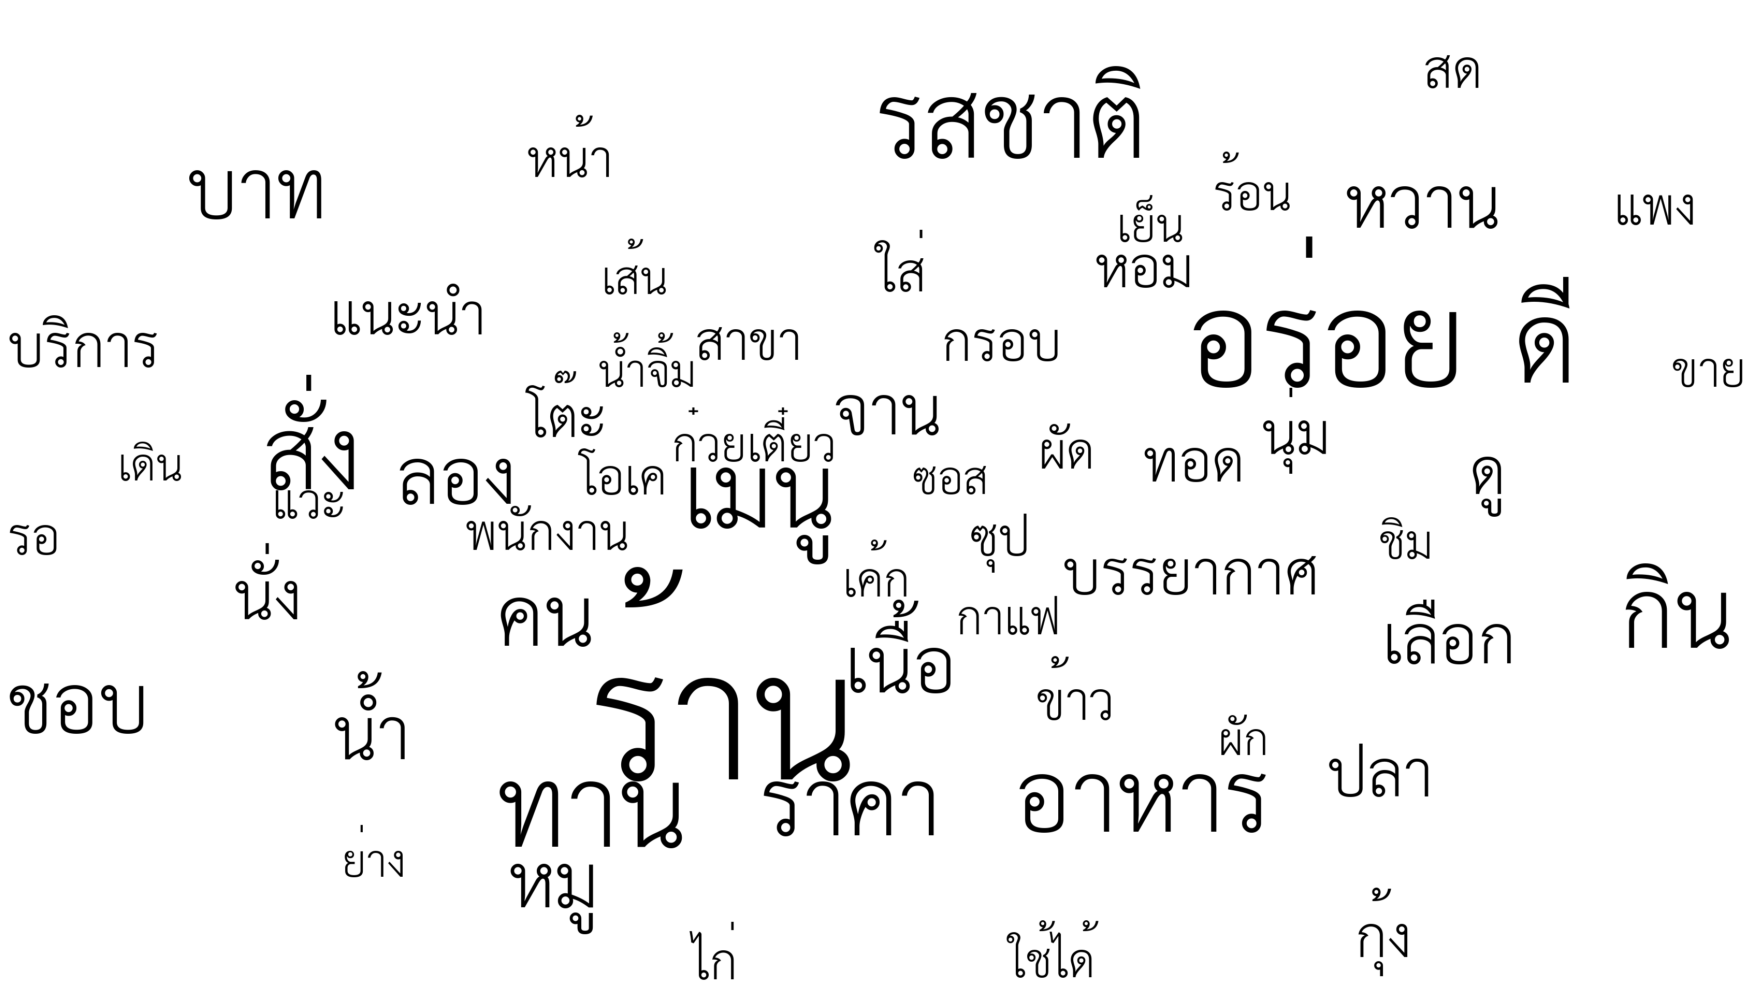

In [20]:
plt.figure(figsize=(32,18))
plt.imshow(wn_rawwc,interpolation="bilinear")
plt.axis('off')

#Create Wordcloud 
both TH & ENG are the same except wn_focused_w_count_len <br>
in EN corpus it might be xx_focused_w_count_len = wn_focused_w_count_eq = {k:v/len(k) for k in wn_tsne_d.keys()} <br>
Thai data from Wongnai


###preprocessing data

required files:
*   wn_emb300di.txt
*   wn_tsne_d.json
*   newwn_count.json



In [ ]:
with open("/content/newwn_count.json") as f:
  wn_focused_w_count = json.load(f)

In [ ]:
with open("/content/wn_tsne_d.json") as f:
  wn_tsne_d = json.load(f)

In [ ]:
#for kmeans

from gensim.test.utils import datapath, get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath('/content/wn_emb300di.txt')
tmp_file = get_tmpfile('wn_emb300di.w2vformat.txt')

_ = glove2word2vec(glove_file, tmp_file)
wn_focused_model = KeyedVectors.load_word2vec_format(tmp_file)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  if __name__ == '__main__':


In [ ]:
wn_focused_w_count_len = {}

up_n_down = set()
up_n_down.update({"\u0e31","\u0e3a","\u0e34","\u0e35","\u0e36","\u0e37","\u0e38","\u0e39"})
up_n_down.update({"\u0e47","\u0e48","\u0e49","\u0e4a","\u0e4b","\u0e47c","\u0e4d","\u0e4e","\u0e4f",'์'})

not_up_n_down =set()
check_istruly_updown = set()

for k,v in wn_focused_w_count.items():
  for char in k:
    count = len(k)
    if char not in up_n_down:
      not_up_n_down.add(char)
    else:
      check_istruly_updown.add(char)
      count -= 1
  wn_focused_w_count_len[k] = v/count

In [ ]:
wn_focused_w_count_eq = {k:1 for k in wn_tsne_d.keys()}
wn_focused_w_count_eq

{'กรอบ': 1,
 'กาแฟ': 1,
 'กิน': 1,
 'กุ้ง': 1,
 'ก๋วยเตี๋ยว': 1,
 'ขาย': 1,
 'ข้าว': 1,
 'คน': 1,
 'จาน': 1,
 'ชอบ': 1,
 'ชิม': 1,
 'ซอส': 1,
 'ซุป': 1,
 'ดี': 1,
 'ดู': 1,
 'ทอด': 1,
 'ทาน': 1,
 'นั่ง': 1,
 'นุ่ม': 1,
 'น้ำ': 1,
 'น้ำจิ้ม': 1,
 'บรรยากาศ': 1,
 'บริการ': 1,
 'บาท': 1,
 'ปลา': 1,
 'ผัก': 1,
 'ผัด': 1,
 'พนักงาน': 1,
 'ย่าง': 1,
 'รส': 1,
 'รสชาติ': 1,
 'รอ': 1,
 'ราคา': 1,
 'ร้อน': 1,
 'ร้าน': 1,
 'ลอง': 1,
 'สด': 1,
 'สั่ง': 1,
 'สาขา': 1,
 'หน้า': 1,
 'หมู': 1,
 'หวาน': 1,
 'หอม': 1,
 'อร่อย': 1,
 'อาหาร': 1,
 'เค้ก': 1,
 'เดิน': 1,
 'เนื้อ': 1,
 'เมนู': 1,
 'เย็น': 1,
 'เลือก': 1,
 'เส้น': 1,
 'แนะนำ': 1,
 'แพง': 1,
 'แวะ': 1,
 'โต๊ะ': 1,
 'โอเค': 1,
 'ใช้ได้': 1,
 'ใส่': 1,
 'ไก่': 1}

### tsne wordcloud

In [ ]:
wn_focused_w_count.keys()==wn_tsne_d.keys()

True

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
wn_tsne_d

{'กรอบ': [144.3194351196289, 243.03972625732422],
 'กาแฟ': [146.70526504516602, 118.93017196655273],
 'กิน': [40.50547790527344, 123.69058418273926],
 'กุ้ง': [206.24877166748047, 154.83965301513672],
 'ก๋วยเตี๋ยว': [105.67157196998596, 126.13082885742188],
 'ขาย': [117.55235195159912, 211.78519439697266],
 'ข้าว': [160.39165496826172, 127.59793090820312],
 'คน': [144.8378448486328, 187.03102111816406],
 'จาน': [148.5400276184082, 153.93099975585938],
 'ชอบ': [44.056644439697266, 41.009403228759766],
 'ชิม': [49.30454635620117, 103.98730218410492],
 'ซอส': [124.91537475585938, 118.50010681152344],
 'ซุป': [114.68506908416748, 112.7299337387085],
 'ดี': [82.39952850341797, 20.979347229003906],
 'ดู': [47.584754943847656, 86.25246238708496],
 'ทอด': [123.5749568939209, 81.62823677062988],
 'ทาน': [0.0, 121.98459053039551],
 'นั่ง': [51.645694732666016, 156.94945907592773],
 'นุ่ม': [112.89887428283691, 58.03036880493164],
 'น้ำ': [115.60908794403076, 139.99500274658203],
 'น้ำจิ้ม': [95.

In [ ]:
import processing
import numpy as np

# wn_csv = pd.read_csv(r'/content/wn_emb300di.txt',header=None,index_col=0,delimiter = ' ').rename_axis(None)
# wn_csv.columns = range(wn_csv.shape[1])
# # wn_csv[wn_csv.select_dtypes(np.float64).columns] = wn_csv.select_dtypes(np.float64).astype(np.float32)
# wn_csv2 = [(wn_csv.index[i],wn_csv.to_numpy()[i]) for i in range(len(wn_csv.index))]
# processing.plot_TSNE(wn_csv2)


In [ ]:
processing.plot_TSNE(processing.embed_w2v(wn_focused_w_count, lang='TH'), lang='TH')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


{'กรอบ': (336.6510543823242, 215.9936752319336),
 'กาแฟ': (339.1051902770996, 394.9305648803711),
 'กิน': (565.3257446289062, 372.5330581665039),
 'กุ้ง': (465.922119140625, 589.3216552734375),
 'ก๋วยเตี๋ยว': (274.46945238113403, 311.0700993537903),
 'ขาย': (588.6199340820312, 261.23102951049805),
 'ข้าว': (361.7088928222656, 434.83253479003906),
 'คน': (191.81687927246094, 414.04492950439453),
 'จาน': (298.2205638885498, 260.02864837646484),
 'ชอบ': (14.68505859375, 453.09539794921875),
 'ชิม': (473.5629577636719, 341.9871406555176),
 'ซอส': (319.36134338378906, 307.3886979818344),
 'ซุป': (336.2593460083008, 339.3536605834961),
 'ดี': (520.8655242919922, 181.01148986816406),
 'ดู': (501.2309265136719, 301.1504988670349),
 'ทอด': (401.8379669189453, 295.3766794204712),
 'ทาน': (212.21836853027344, 489.91143798828125),
 'นั่ง': (88.6669921875, 359.2705612182617),
 'นุ่ม': (463.1184387207031, 201.5813980102539),
 'น้ำ': (123.4873046875, 444.79808044433594),
 'น้ำจิ้ม': (245.948310852050

/content/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]


[('ร้าน', 400), ('อร่อย', 297), ('ทาน', 257), ('ดี', 257), ('รสชาติ', 239), ('เมนู', 237), ('สั่ง', 229), ('อาหาร', 227), ('กิน', 221), ('ราคา', 212), ('คน', 191), ('บาท', 190), ('ชอบ', 188), ('ลอง', 178), ('เนื้อ', 176), ('หมู', 173), ('น้ำ', 166), ('หวาน', 165), ('รส', 157), ('จาน', 156), ('เลือก', 156), ('นั่ง', 153), ('ปลา', 150), ('ดู', 148), ('บรรยากาศ', 143), ('บริการ', 136), ('ทอด', 134), ('นุ่ม', 133), ('กุ้ง', 131), ('แนะนำ', 130), ('หอม', 128), ('โต๊ะ', 125), ('กรอบ', 124), ('ใส่', 124), ('สาขา', 121), ('สด', 120), ('ข้าว', 120), ('แพง', 117), ('ซุป', 117), ('หน้า', 116), ('รอ', 116), ('ผัด', 114), ('ไก่', 114), ('พนักงาน', 113), ('โอเค', 111), ('ร้อน', 109), ('ขาย', 108), ('แวะ', 108), ('ชิม', 108), ('กาแฟ', 107), ('เค้ก', 107), ('ก๋วยเตี๋ยว', 107), ('ใช้ได้', 107), ('เย็น', 106), ('เส้น', 104), ('ซอส', 104), ('น้ำจิ้ม', 103), ('ผัก', 103), ('ย่าง', 103), ('เดิน', 102)]


(-0.5, 3359.5, 1889.5, -0.5)

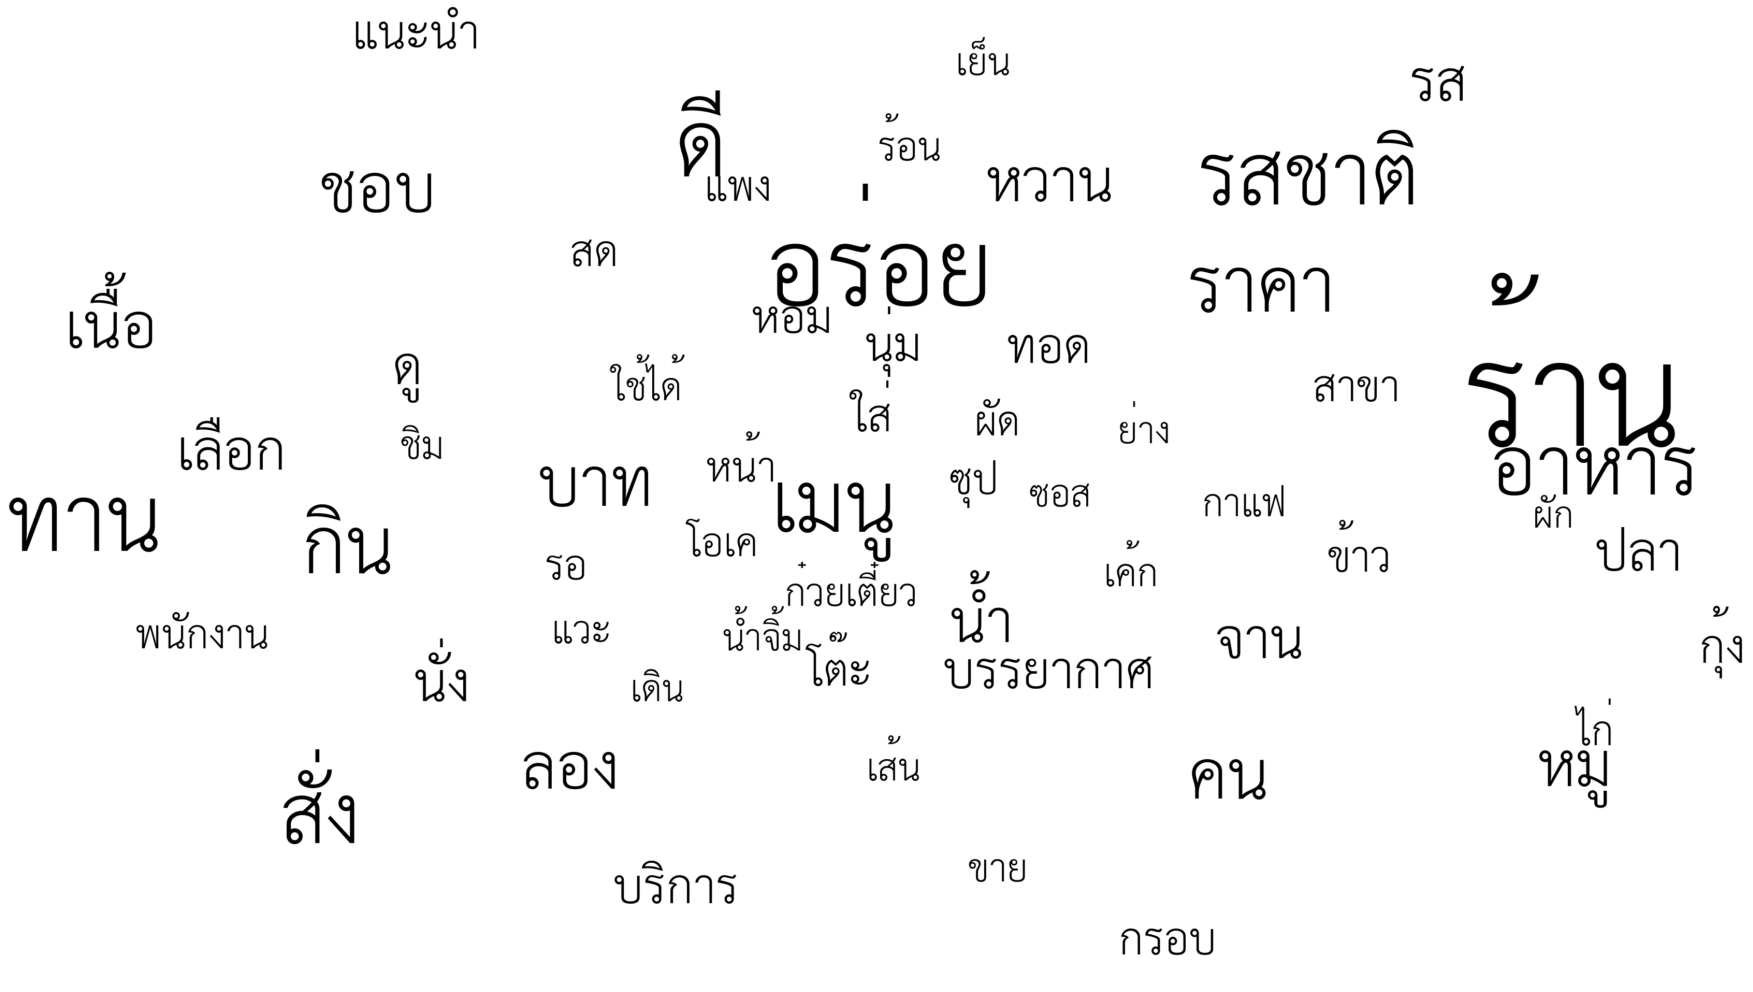

In [ ]:
### word size = raw frequency
wn_rawwc = WordCloud(font_path=path,
                    #  stopwords=gensim.parsing.preprocessing.STOPWORDS,
                     background_color='white',
                     width=3360,
                     height=1890,
                     colormap='tab10',
                     color_func=lambda *args, **kwargs: "black",
                     prefer_horizontal=1.0)

wn_rawwc.generate_from_frequencies(wn_focused_w_count,max_font_size=400,tsne_plot=wn_tsne_d,lang='TH')
# wn_rawwc.generate_from_frequencies(wn_focused_w_count,max_font_size=400,lang='TH')
plt.figure(figsize=(32,18))
plt.imshow(wn_rawwc,interpolation="bilinear")
plt.axis('off')

###tsne recolour

In [ ]:
cols = ["#BF0F61","#4696A2","#D95043","#55A45B","#695752","#834fab"]

In [ ]:
color_to_words = {cols[col]: [wn_k_means_freq[col][1][i][0] for i in range(10)] for col in range(len(wn_k_means_freq))}
color_to_words

{'#4696A2': ['อร่อย',
  'เมนู',
  'จาน',
  'นุ่ม',
  'ผัด',
  'โอเค',
  'แวะ',
  'ชิม',
  'ก๋วยเตี๋ยว',
  'น้ำจิ้ม'],
 '#55A45B': ['รสชาติ',
  'หมู',
  'หวาน',
  'หอม',
  'ซุป',
  'ไก่',
  'กาแฟ',
  'เค้ก',
  'ซอส',
  'ผัก'],
 '#695752': ['ดี',
  'บาท',
  'ชอบ',
  'ลอง',
  'ดู',
  'แพง',
  'หน้า',
  'รอ',
  'ร้อน',
  'เย็น'],
 '#834fab': ['อาหาร',
  'กิน',
  'ราคา',
  'เนื้อ',
  'น้ำ',
  'ปลา',
  'ทอด',
  'กุ้ง',
  'สด',
  'ข้าว'],
 '#BF0F61': ['ทาน',
  'สั่ง',
  'เลือก',
  'นั่ง',
  'บรรยากาศ',
  'แนะนำ',
  'โต๊ะ',
  'พนักงาน',
  'ขาย',
  'เดิน'],
 '#D95043': ['ร้าน',
  'คน',
  'รส',
  'บริการ',
  'กรอบ',
  'ใส่',
  'สาขา',
  'ใช้ได้',
  'เส้น',
  'ย่าง']}

In [ ]:
default_color = "#2D2926"

# Create a color function with multiple tones
gcfunc = wc.grouped_color_func(color_to_words, default_color)
gcfunc.color_func_to_words

[(<function wordcloud.get_single_color_func.<locals>.single_color_func>,
  {'ขาย',
   'ทาน',
   'นั่ง',
   'บรรยากาศ',
   'พนักงาน',
   'สั่ง',
   'เดิน',
   'เลือก',
   'แนะนำ',
   'โต๊ะ'}),
 (<function wordcloud.get_single_color_func.<locals>.single_color_func>,
  {'ก๋วยเตี๋ยว',
   'จาน',
   'ชิม',
   'นุ่ม',
   'น้ำจิ้ม',
   'ผัด',
   'อร่อย',
   'เมนู',
   'แวะ',
   'โอเค'}),
 (<function wordcloud.get_single_color_func.<locals>.single_color_func>,
  {'กรอบ',
   'คน',
   'บริการ',
   'ย่าง',
   'รส',
   'ร้าน',
   'สาขา',
   'เส้น',
   'ใช้ได้',
   'ใส่'}),
 (<function wordcloud.get_single_color_func.<locals>.single_color_func>,
  {'กาแฟ',
   'ซอส',
   'ซุป',
   'ผัก',
   'รสชาติ',
   'หมู',
   'หวาน',
   'หอม',
   'เค้ก',
   'ไก่'}),
 (<function wordcloud.get_single_color_func.<locals>.single_color_func>,
  {'ชอบ', 'ดี', 'ดู', 'บาท', 'รอ', 'ร้อน', 'ลอง', 'หน้า', 'เย็น', 'แพง'}),
 (<function wordcloud.get_single_color_func.<locals>.single_color_func>,
  {'กิน',
   'กุ้ง',
   'ข้าว',

In [ ]:
wn_rawwc.layout_

[(('ร้าน', 1.0), 400, (515, 2812), None, 'black'),
 (('อร่อย', 0.4850653632801893), 297, (343, 1468), None, 'black'),
 (('ทาน', 0.35409635750029095), 257, (949, 0), None, 'black'),
 (('ดี', 0.35277745451724274), 257, (163, 1291), None, 'black'),
 (('รสชาติ', 0.3037162031110594), 239, (239, 2300), None, 'black'),
 (('เมนู', 0.2975580899181504), 237, (920, 1476), None, 'black'),
 (('สั่ง', 0.2779781993095155), 229, (1435, 529), None, 'black'),
 (('อาหาร', 0.2740796772566818), 227, (852, 2866), None, 'black'),
 (('กิน', 0.25973660731603243), 221, (962, 570), None, 'black'),
 (('ราคา', 0.23759649326971566), 212, (505, 2280), None, 'black'),
 (('คน', 0.1902226618565499), 191, (1454, 2282), None, 'black'),
 (('บาท', 0.1882443073819776), 190, (889, 1026), None, 'black'),
 (('ชอบ', 0.18336630590790953), 188, (319, 605), None, 'black'),
 (('ลอง', 0.16407734978082936), 178, (1440, 994), None, 'black'),
 (('เนื้อ', 0.15980061290197448), 176, (513, 112), None, 'black'),
 (('หมู', 0.154825633267388

(-0.5, 3359.5, 1889.5, -0.5)

<Figure size 432x288 with 0 Axes>

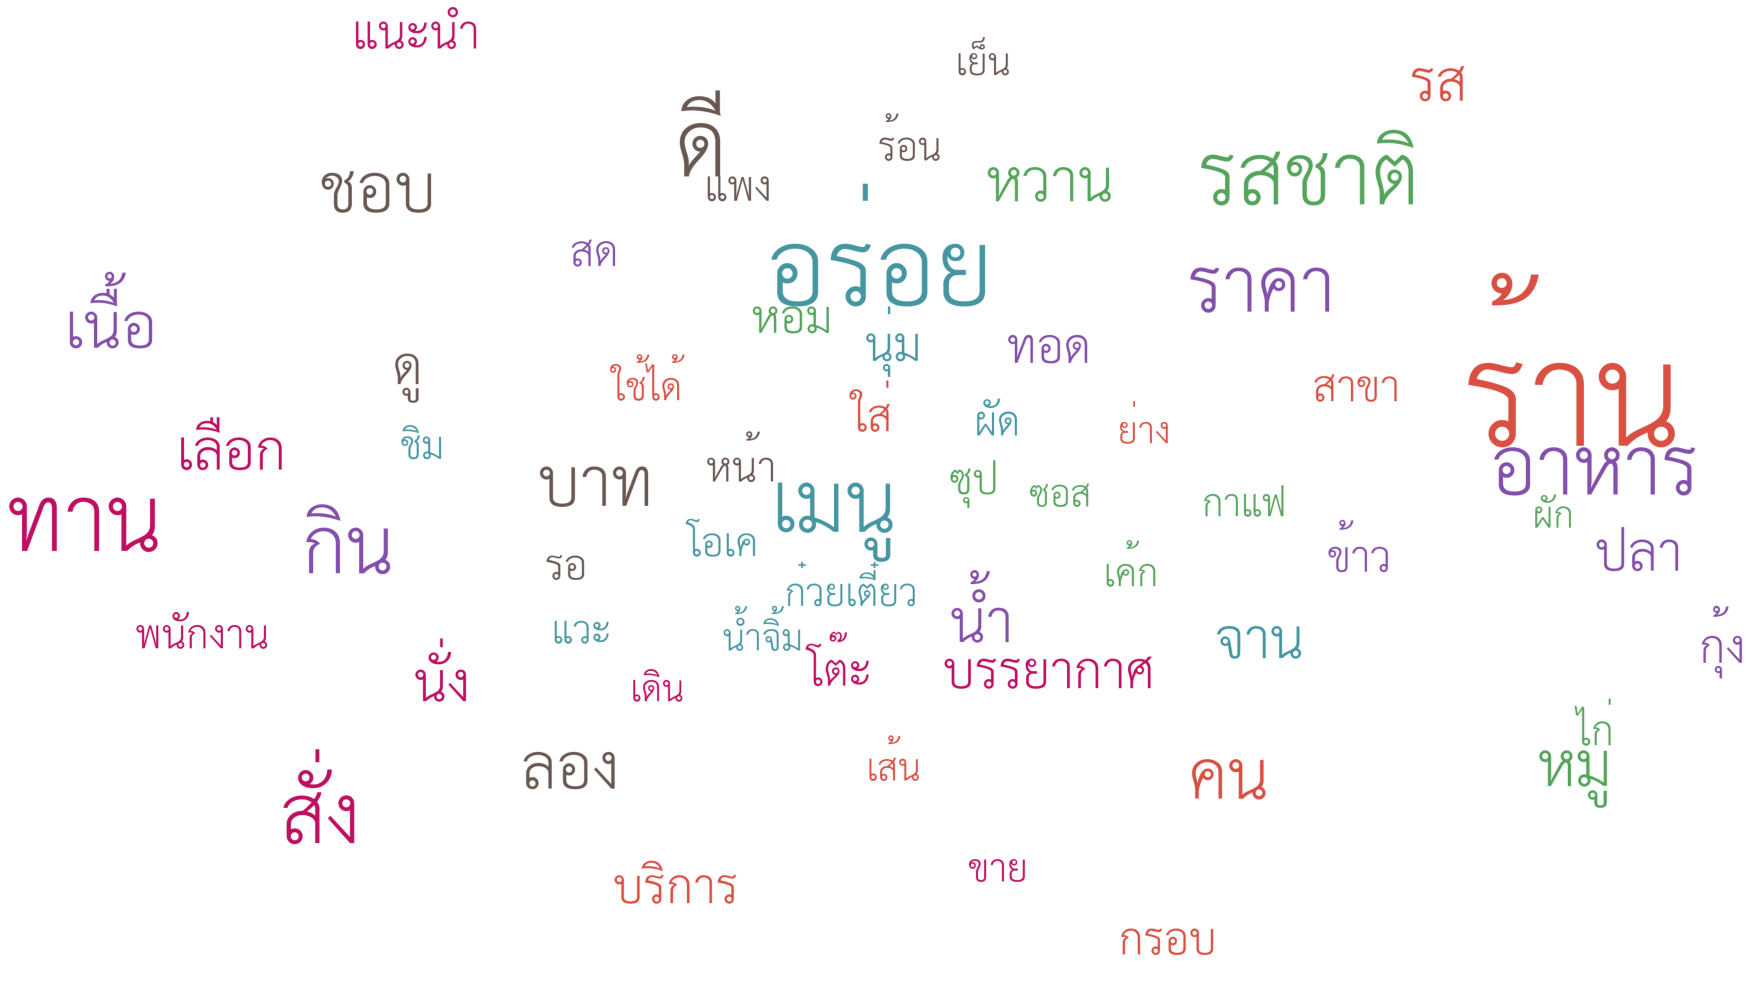

In [ ]:
# Apply our color function
wn_rawwc.recolor(color_func=gcfunc) #you may try wn_eqwc

# Plot
plt.figure()
plt.figure(figsize=(32,18))
plt.imshow(wn_rawwc)
plt.axis('off')

(-0.5, 3359.5, 1889.5, -0.5)

<Figure size 432x288 with 0 Axes>

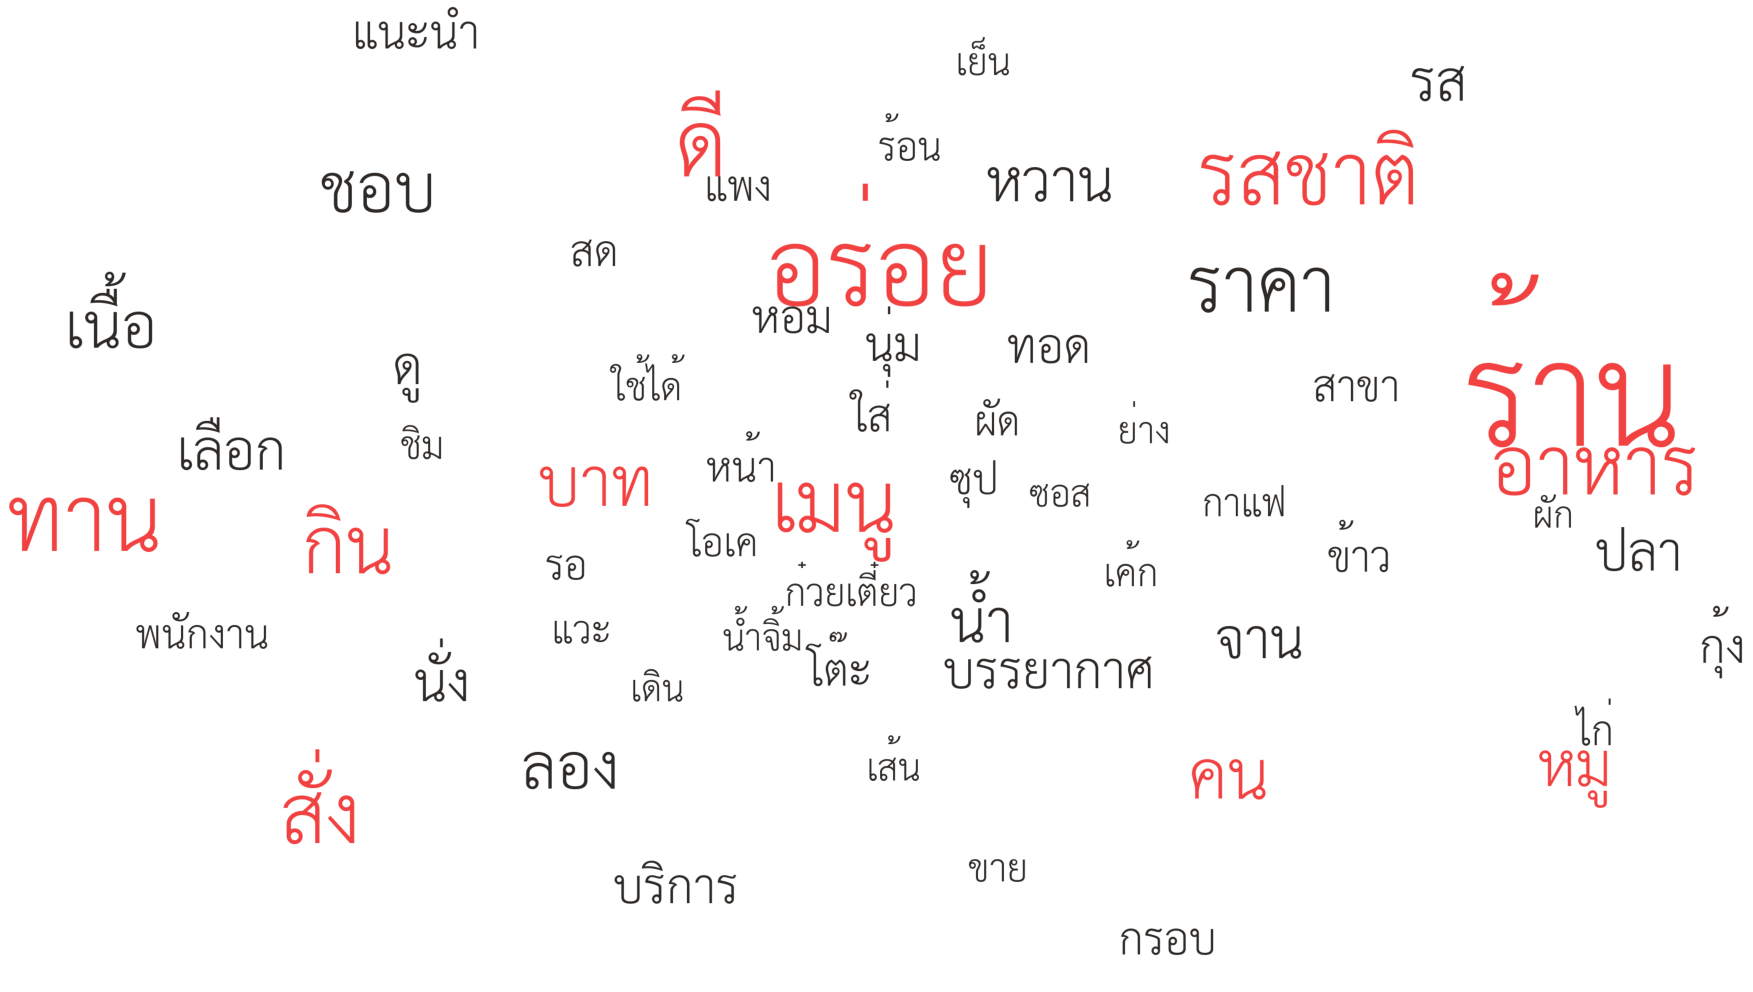

In [ ]:
cherry = "#F24141"
color_to_words = {cherry: [wn_k_means_freq[col][1][i][0] for i in range(10) if i < 2 for col in range(len(wn_k_means_freq)) ]}
default_color = "#2D2926"

# Create a color function with multiple tones
gcfunc = wc.grouped_color_func(color_to_words,default_color)

# Apply our color function
wn_rawwc.recolor(color_func=gcfunc) #you may try wn_eqwc

# Plot
plt.figure()
plt.figure(figsize=(32,18))
plt.imshow(wn_rawwc)
plt.axis('off')

###pre data for combined with kmeans

In [ ]:
wn_focused_w_list = [k for k in wn_focused_w_count.keys()]

In [ ]:
wn_k_means_freq = wc.generate_kmeans_frequencies(wn_focused_w_list,wn_focused_w_count,wn_focused_model,NUM_CLUSTERS = 6,size_min=10,size_max=12)

/content/wordcloud.py:1135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clus_i['total'] = clus_i['word_count'].sum()


In [ ]:
wn_k_means_freq

[(0,
  [('ทาน', 0.2645045384409206),
   ('สั่ง', 0.20764544381098643),
   ('เลือก', 0.09352158385430627),
   ('นั่ง', 0.08978361814796838),
   ('บรรยากาศ', 0.07832342096303326),
   ('แนะนำ', 0.0665227501575596),
   ('โต๊ะ', 0.06205312837304318),
   ('พนักงาน', 0.05034663112218656),
   ('ขาย', 0.04667386249212202),
   ('เดิน', 0.04062502263787371)]),
 (1,
  [('อร่อย', 0.353032516710074),
   ('เมนู', 0.21656397117468115),
   ('จาน', 0.09145898179713582),
   ('นุ่ม', 0.06707321376895985),
   ('ผัด', 0.05011963495458106),
   ('โอเค', 0.04740226282987839),
   ('แวะ', 0.045193074583042184),
   ('ชิม', 0.044790762346397894),
   ('ก๋วยเตี๋ยว', 0.043901440560131566),
   ('น้ำจิ้ม', 0.04046414127511805)]),
 (2,
  [('ร้าน', 0.5485185382201181),
   ('คน', 0.10434065641789457),
   ('รส', 0.06944518325442843),
   ('บริการ', 0.05225809883504442),
   ('กรอบ', 0.04452364487472738),
   ('ใส่', 0.04416724293845417),
   ('สาขา', 0.042374594393318796),
   ('ใช้ได้', 0.03301239427629129),
   ('เส้น', 0.0311

In [ ]:
wn_kmeans_nearrank ={}
for i,lst in wn_k_means_freq:
  for j,tup in enumerate(lst):
      if j == 0:
        wn_kmeans_nearrank[tup[0]] = 1
      elif j == 1:
        wn_kmeans_nearrank[tup[0]] = 0.8
      elif j == 2:
        wn_kmeans_nearrank[tup[0]] = 0.6
      elif j == 3:
        wn_kmeans_nearrank[tup[0]] = 0.5
      else:
        wn_kmeans_nearrank[tup[0]] = 0.4
wn_kmeans_nearrank

{'กรอบ': 0.4,
 'กาแฟ': 0.4,
 'กิน': 0.8,
 'กุ้ง': 0.4,
 'ก๋วยเตี๋ยว': 0.4,
 'ขาย': 0.4,
 'ข้าว': 0.4,
 'คน': 0.8,
 'จาน': 0.6,
 'ชอบ': 0.6,
 'ชิม': 0.4,
 'ซอส': 0.4,
 'ซุป': 0.4,
 'ดี': 1,
 'ดู': 0.4,
 'ทอด': 0.4,
 'ทาน': 1,
 'นั่ง': 0.5,
 'นุ่ม': 0.5,
 'น้ำ': 0.4,
 'น้ำจิ้ม': 0.4,
 'บรรยากาศ': 0.4,
 'บริการ': 0.5,
 'บาท': 0.8,
 'ปลา': 0.4,
 'ผัก': 0.4,
 'ผัด': 0.4,
 'พนักงาน': 0.4,
 'ย่าง': 0.4,
 'รส': 0.6,
 'รสชาติ': 1,
 'รอ': 0.4,
 'ราคา': 0.6,
 'ร้อน': 0.4,
 'ร้าน': 1,
 'ลอง': 0.5,
 'สด': 0.4,
 'สั่ง': 0.8,
 'สาขา': 0.4,
 'หน้า': 0.4,
 'หมู': 0.8,
 'หวาน': 0.6,
 'หอม': 0.5,
 'อร่อย': 1,
 'อาหาร': 1,
 'เค้ก': 0.4,
 'เดิน': 0.4,
 'เนื้อ': 0.5,
 'เมนู': 0.8,
 'เย็น': 0.4,
 'เลือก': 0.6,
 'เส้น': 0.4,
 'แนะนำ': 0.4,
 'แพง': 0.4,
 'แวะ': 0.4,
 'โต๊ะ': 0.4,
 'โอเค': 0.4,
 'ใช้ได้': 0.4,
 'ใส่': 0.4,
 'ไก่': 0.4}

In [ ]:
wn_kmeans_bigrank ={}
for i,lst in wn_k_means_freq:
  for j,tup in enumerate(lst):
      if j >= 0 and j<=3:
        wn_kmeans_bigrank[tup[0]] = 1/(2**j)
      # elif j == 1:
      #   wn_kmeans_bigrank[tup[0]] = 0.5
      # elif j == 2:
      #   wn_kmeans_bigrank[tup[0]] = 0.25
      # elif j == 3:
      #   wn_kmeans_bigrank[tup[0]] = 0.125
      else:
        wn_kmeans_bigrank[tup[0]] = 0.1

wn_kmeans_bigrank

{'กรอบ': 0.1,
 'กาแฟ': 0.1,
 'กิน': 0.5,
 'กุ้ง': 0.1,
 'ก๋วยเตี๋ยว': 0.1,
 'ขาย': 0.1,
 'ข้าว': 0.1,
 'คน': 0.5,
 'จาน': 0.25,
 'ชอบ': 0.25,
 'ชิม': 0.1,
 'ซอส': 0.1,
 'ซุป': 0.1,
 'ดี': 1.0,
 'ดู': 0.1,
 'ทอด': 0.1,
 'ทาน': 1.0,
 'นั่ง': 0.125,
 'นุ่ม': 0.125,
 'น้ำ': 0.1,
 'น้ำจิ้ม': 0.1,
 'บรรยากาศ': 0.1,
 'บริการ': 0.125,
 'บาท': 0.5,
 'ปลา': 0.1,
 'ผัก': 0.1,
 'ผัด': 0.1,
 'พนักงาน': 0.1,
 'ย่าง': 0.1,
 'รส': 0.25,
 'รสชาติ': 1.0,
 'รอ': 0.1,
 'ราคา': 0.25,
 'ร้อน': 0.1,
 'ร้าน': 1.0,
 'ลอง': 0.125,
 'สด': 0.1,
 'สั่ง': 0.5,
 'สาขา': 0.1,
 'หน้า': 0.1,
 'หมู': 0.5,
 'หวาน': 0.25,
 'หอม': 0.125,
 'อร่อย': 1.0,
 'อาหาร': 1.0,
 'เค้ก': 0.1,
 'เดิน': 0.1,
 'เนื้อ': 0.125,
 'เมนู': 0.5,
 'เย็น': 0.1,
 'เลือก': 0.25,
 'เส้น': 0.1,
 'แนะนำ': 0.1,
 'แพง': 0.1,
 'แวะ': 0.1,
 'โต๊ะ': 0.1,
 'โอเค': 0.1,
 'ใช้ได้': 0.1,
 'ใส่': 0.1,
 'ไก่': 0.1}

#Kmeans & LDA

### kmean wc

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/content/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]


[('ทาน', 400), ('อร่อย', 400), ('ร้าน', 400), ('รสชาติ', 400), ('ดี', 400), ('อาหาร', 400), ('สั่ง', 360), ('เมนู', 360), ('คน', 360), ('หมู', 360), ('บาท', 360), ('กิน', 360), ('เลือก', 315), ('จาน', 315), ('รส', 315), ('หวาน', 315), ('ชอบ', 315), ('ราคา', 315), ('นั่ง', 289), ('นุ่ม', 289), ('บริการ', 289), ('หอม', 289), ('ลอง', 289), ('เนื้อ', 289), ('บรรยากาศ', 205), ('แนะนำ', 205), ('โต๊ะ', 205), ('พนักงาน', 205), ('ขาย', 205), ('เดิน', 205), ('ผัด', 205), ('โอเค', 205), ('แวะ', 205), ('ชิม', 205), ('ก๋วยเตี๋ยว', 205), ('น้ำจิ้ม', 201), ('กรอบ', 177), ('ใส่', 177), ('สาขา', 177), ('ใช้ได้', 177), ('เส้น', 177), ('ย่าง', 177), ('ซุป', 177), ('ไก่', 177), ('กาแฟ', 177), ('เค้ก', 177), ('ซอส', 154), ('ผัก', 154), ('ดู', 154), ('แพง', 154), ('หน้า', 154), ('รอ', 154), ('ร้อน', 154), ('เย็น', 154), ('น้ำ', 154), ('ปลา', 154), ('ทอด', 154), ('กุ้ง', 154), ('สด', 154), ('ข้าว', 154)]


(-0.5, 3359.5, 1889.5, -0.5)

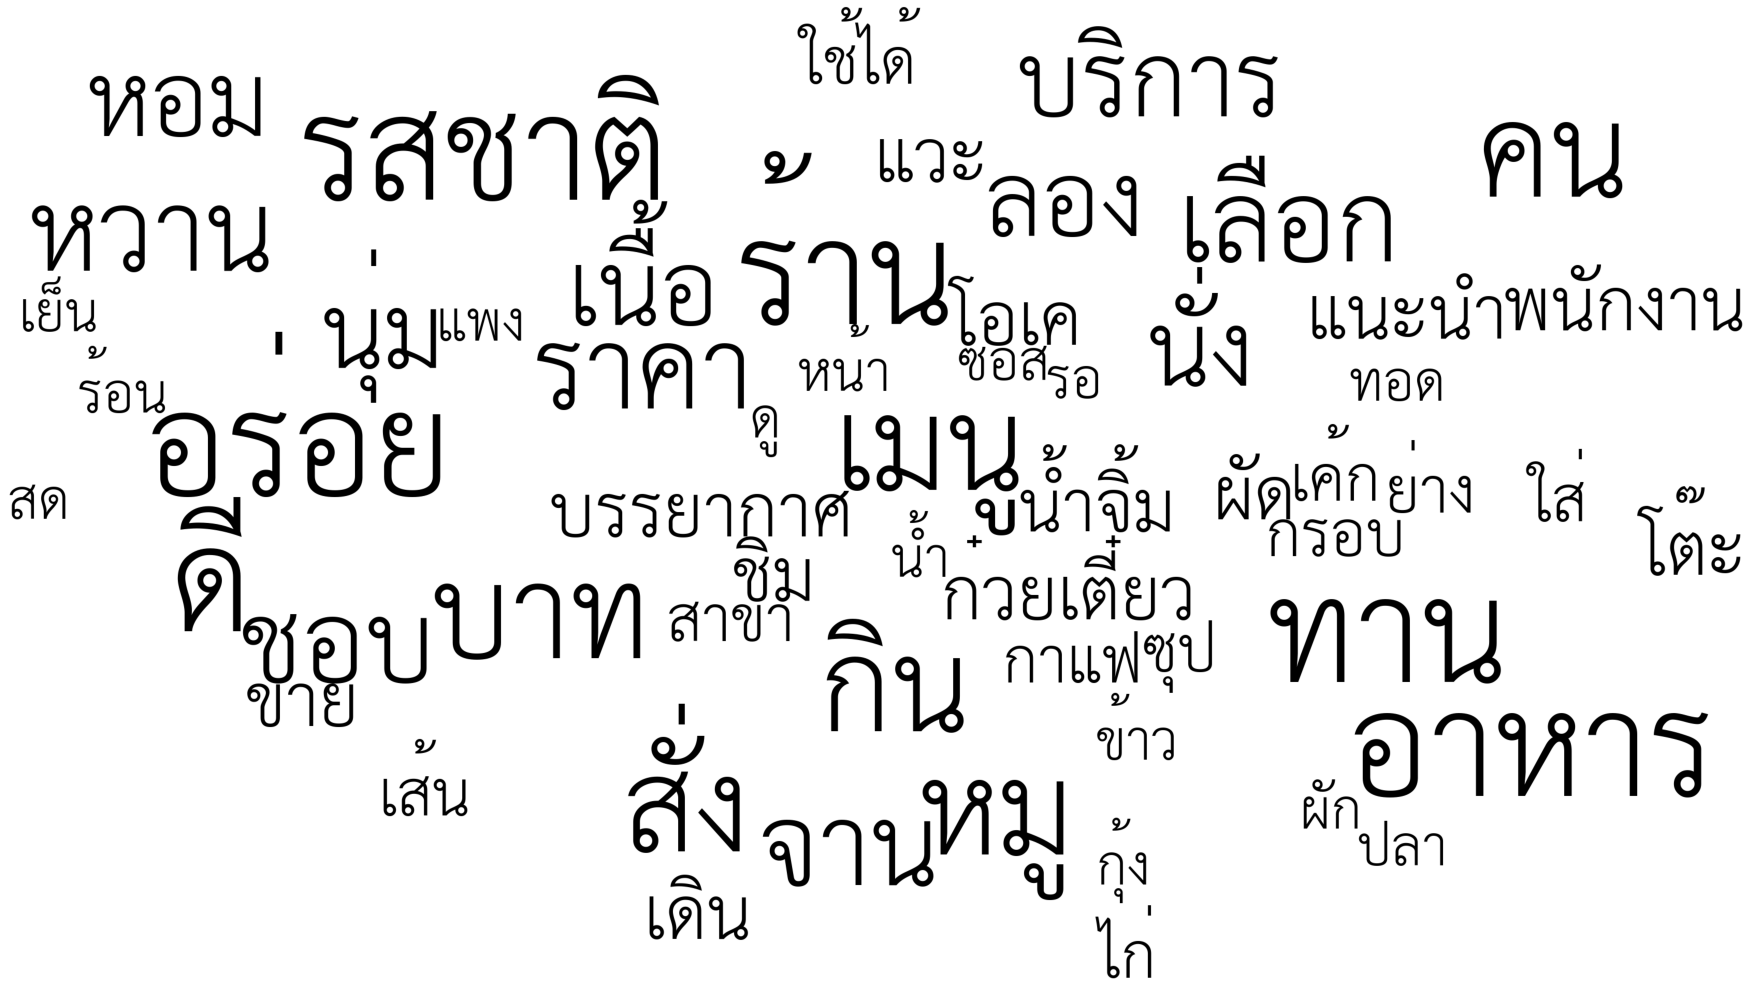

In [ ]:
wn_nearrankwc = WordCloud(font_path=path,
                          stopwords=gensim.parsing.preprocessing.STOPWORDS,
                          background_color='white',
                          width=3360,
                          height=1890,
                          colormap='tab10',
                          color_func=lambda *args, **kwargs: "black",
                          prefer_horizontal=1.0)

wn_nearrankwc.generate_from_frequencies(frequencies = wn_kmeans_nearrank  ,max_font_size=400)
plt.figure(figsize=(32,18))
plt.imshow(wn_nearrankwc)
plt.axis('off')

/content/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]


[('ทาน', 400), ('อร่อย', 400), ('ร้าน', 400), ('รสชาติ', 400), ('ดี', 400), ('อาหาร', 400), ('สั่ง', 300), ('เมนู', 300), ('คน', 300), ('หมู', 300), ('บาท', 300), ('กิน', 300), ('เลือก', 225), ('จาน', 225), ('รส', 225), ('หวาน', 225), ('ชอบ', 225), ('ราคา', 225), ('นั่ง', 169), ('นุ่ม', 169), ('บริการ', 169), ('หอม', 169), ('ลอง', 169), ('เนื้อ', 169), ('บรรยากาศ', 152), ('แนะนำ', 152), ('โต๊ะ', 152), ('พนักงาน', 152), ('ขาย', 152), ('เดิน', 152), ('ผัด', 152), ('โอเค', 152), ('แวะ', 152), ('ชิม', 152), ('ก๋วยเตี๋ยว', 152), ('น้ำจิ้ม', 152), ('กรอบ', 152), ('ใส่', 152), ('สาขา', 152), ('ใช้ได้', 152), ('เส้น', 152), ('ย่าง', 152), ('ซุป', 152), ('ไก่', 152), ('กาแฟ', 152), ('เค้ก', 152), ('ซอส', 152), ('ผัก', 152), ('ดู', 152), ('แพง', 152), ('หน้า', 152), ('รอ', 152), ('ร้อน', 152), ('เย็น', 152), ('น้ำ', 152), ('ปลา', 152), ('ทอด', 152), ('กุ้ง', 152), ('สด', 152), ('ข้าว', 152)]


(-0.5, 3359.5, 1889.5, -0.5)

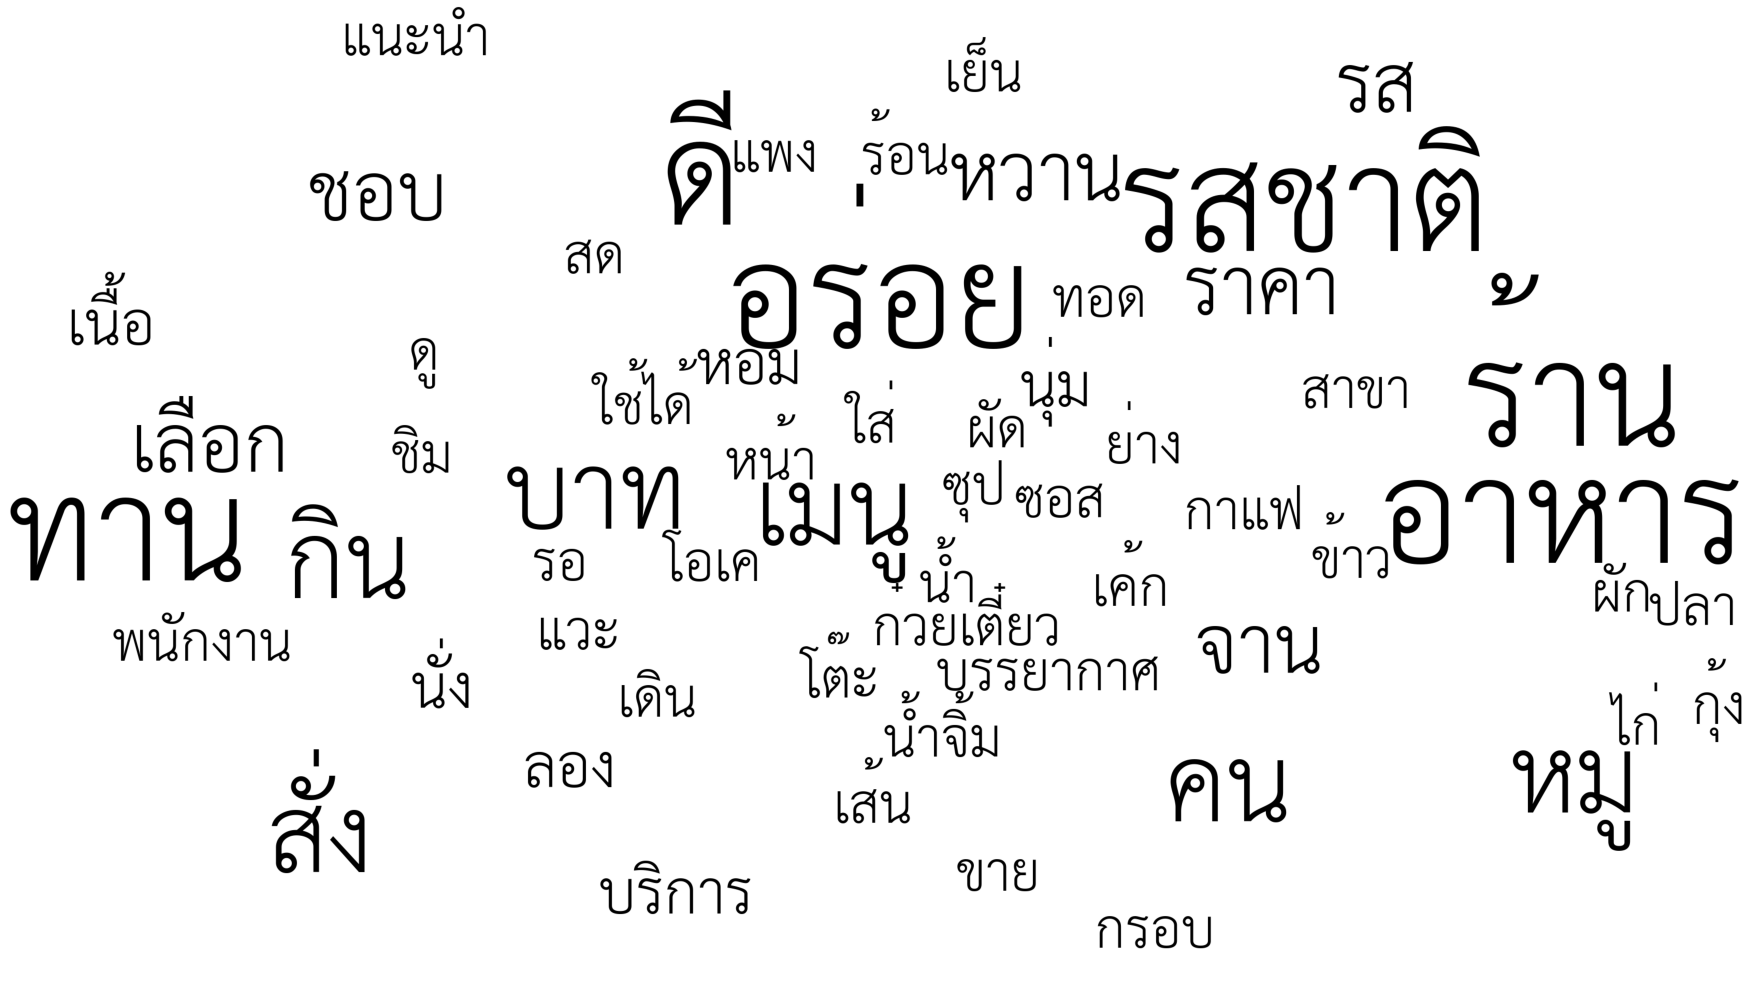

In [ ]:
wn_bigrankwc = WordCloud(font_path=path,
                         stopwords=gensim.parsing.preprocessing.STOPWORDS,
                         background_color='white',
                         width=3360,
                         height=1890,
                         colormap='tab10',
                         color_func=lambda *args, **kwargs: "black",
                         prefer_horizontal=1.0)

wn_bigrankwc.generate_from_frequencies(frequencies = wn_kmeans_bigrank  ,max_font_size=400,tsne_plot=wn_tsne_d)
plt.figure(figsize=(32,18))
plt.imshow(wn_bigrankwc)
plt.axis('off')

###Kmeans con


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/content/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]


[('ทาน', 182), ('สั่ง', 182), ('เลือก', 182), ('นั่ง', 182), ('บรรยากาศ', 182), ('แนะนำ', 182), ('โต๊ะ', 182), ('พนักงาน', 182), ('ขาย', 182), ('เดิน', 182)]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/content/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]


[('อร่อย', 182), ('เมนู', 182), ('จาน', 182), ('นุ่ม', 182), ('ผัด', 182), ('โอเค', 182), ('แวะ', 182), ('ชิม', 182), ('ก๋วยเตี๋ยว', 182), ('น้ำจิ้ม', 182)]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[('ร้าน', 182), ('คน', 182), ('รส', 182), ('บริการ', 182), ('กรอบ', 182), ('ใส่', 182), ('สาขา', 182), ('ใช้ได้', 182), ('เส้น', 182), ('ย่าง', 182)]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[('รสชาติ', 182), ('หมู', 182), ('หวาน', 182), ('หอม', 182), ('ซุป', 182), ('ไก่', 182), ('กาแฟ', 182), ('เค้ก', 182), ('ซอส', 182), ('ผัก', 182)]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/content/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]


[('ดี', 182), ('บาท', 182), ('ชอบ', 182), ('ลอง', 182), ('ดู', 182), ('แพง', 182), ('หน้า', 182), ('รอ', 182), ('ร้อน', 182), ('เย็น', 182)]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/content/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]


[('อาหาร', 182), ('กิน', 182), ('ราคา', 182), ('เนื้อ', 182), ('น้ำ', 182), ('ปลา', 182), ('ทอด', 182), ('กุ้ง', 182), ('สด', 182), ('ข้าว', 182)]


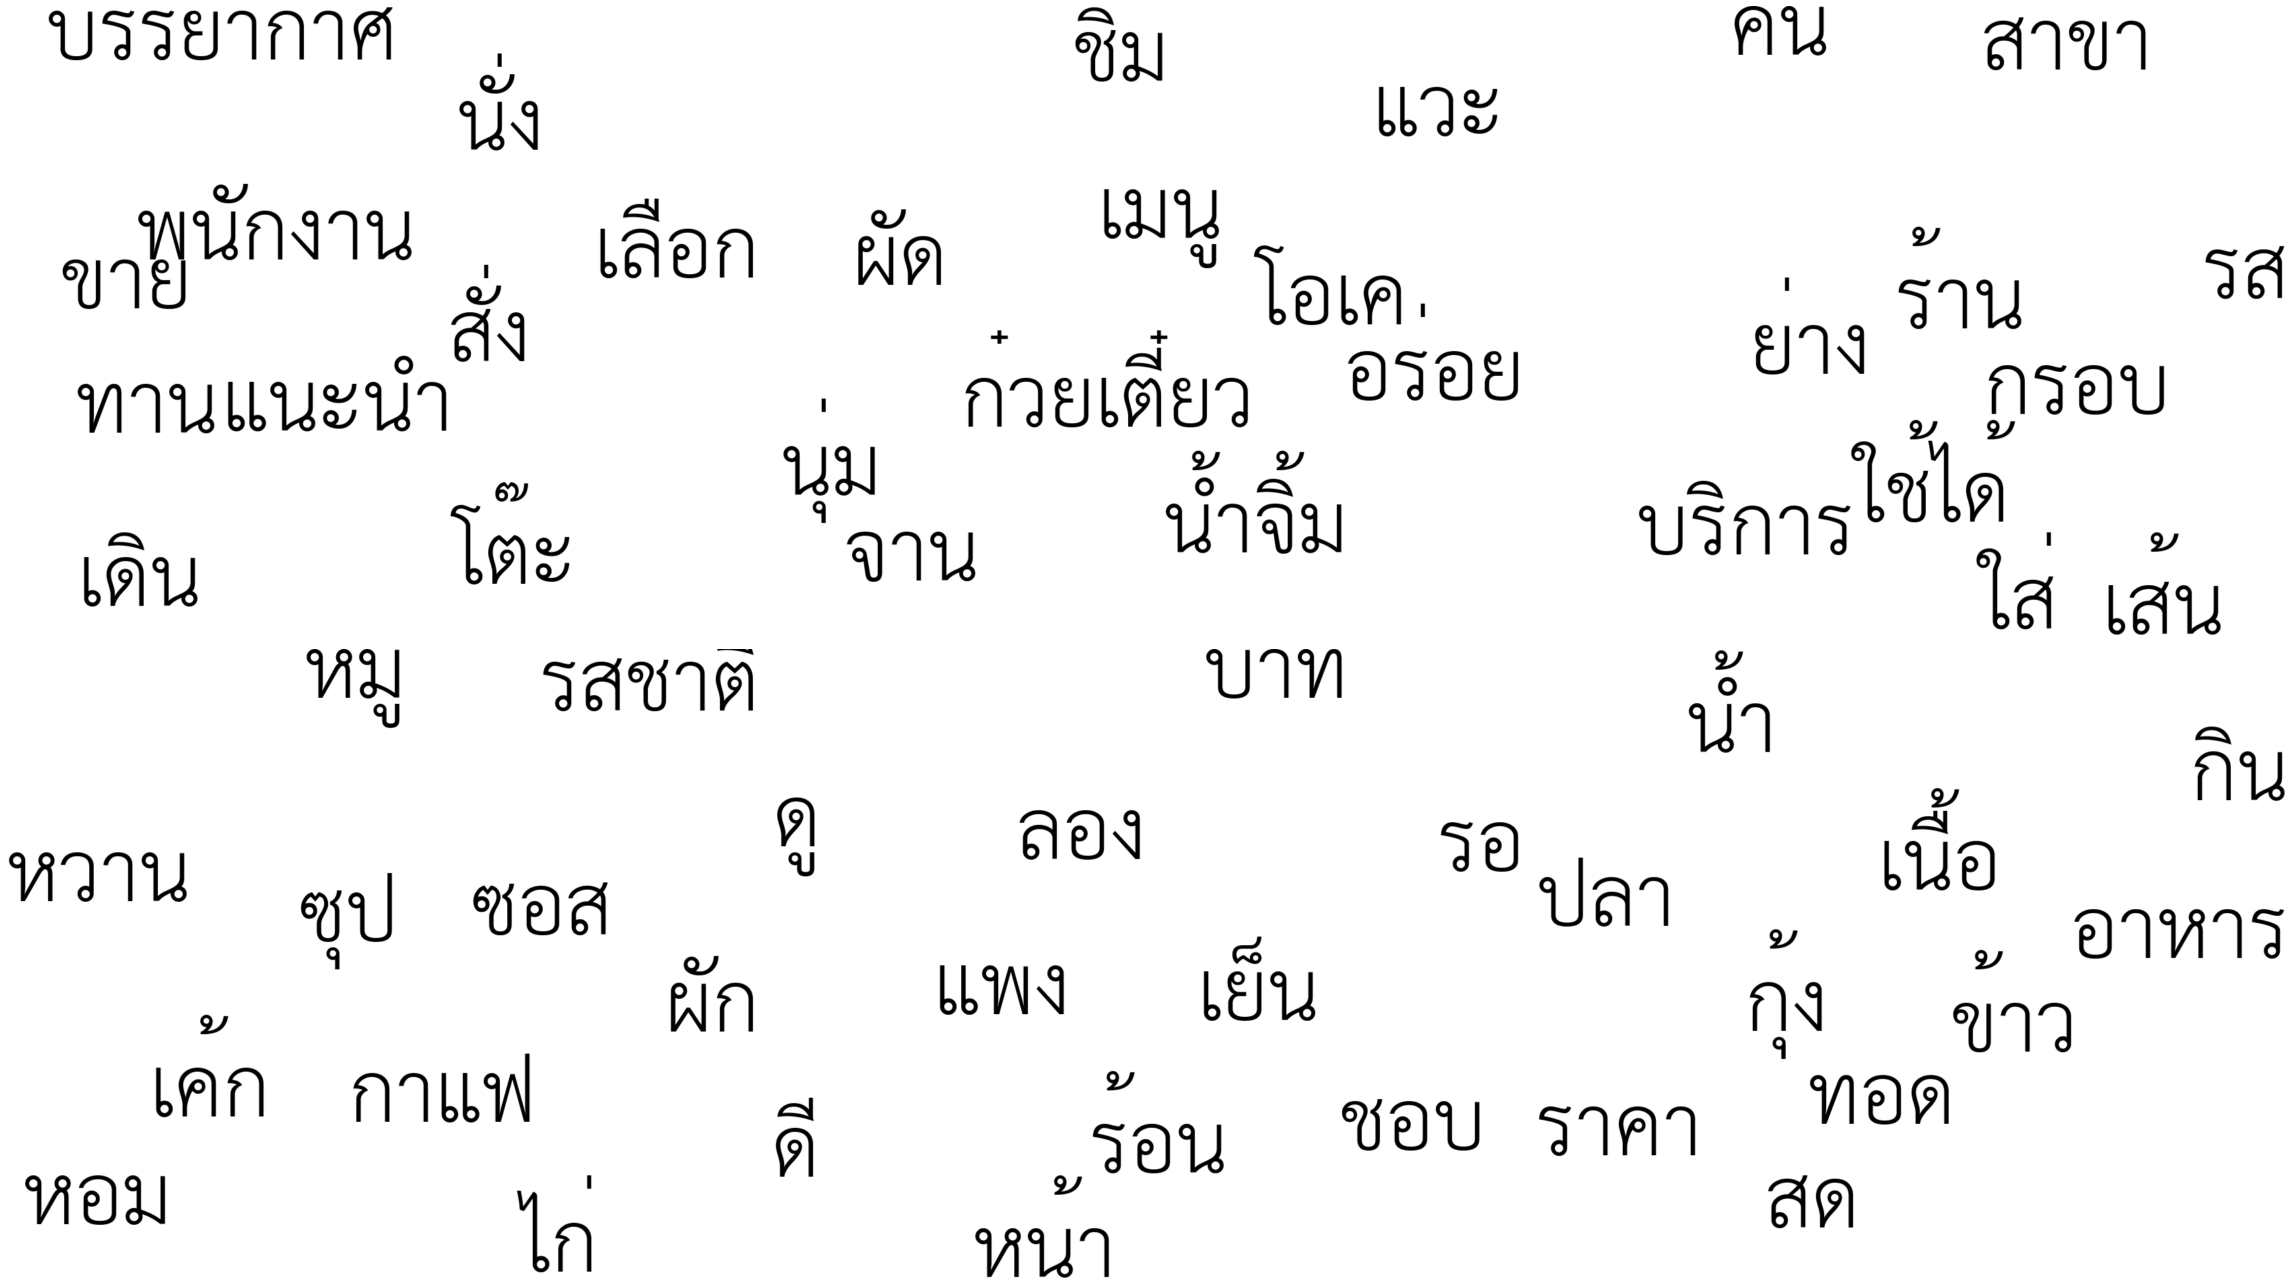

<Figure size 2304x1296 with 0 Axes>

In [ ]:
wn_kmeans_eq =[]  
for i,lst in wn_k_means_freq:
  inside_lst = []
  for j,tup in enumerate(lst):
    inside_lst.append((tup[0],1))
  wn_kmeans_eq.append((i,inside_lst))
wn_kmeans_eq
# i made it equal for study but it's not necessary

wn_kmeans_wc = wc.generate_kmeans_cloud(path,wn_kmeans_eq,182,1120,945) 

###LDA

In [ ]:
# i got it from lda result and just passed it ; my laziness ordered me to do it
wnldamallet_show = [(0,
  [('หวาน', 0.024051850394561394),
   ('รส', 0.018733468861346098),
   ('รสชาติ', 0.01654534723588432),
   ('ชอบ', 0.014494939558878178),
   ('อร่อย', 0.0143135068966271),
   ('ทาน', 0.014110214877478305),
   ('ลอง', 0.013885063501431788),
   ('กาแฟ', 0.013705816774870483),
   ('เค้ก', 0.013681771482282992),
   ('เมนู', 0.013504710691411459)]),
 (1,
  [('ร้าน', 0.05822836422277045),
   ('อร่อย', 0.043426173443559486),
   ('หมู', 0.03657025313991071),
   ('น้ำ', 0.03379398337445053),
   ('ทาน', 0.024812338365894946),
   ('บาท', 0.02126411900393305),
   ('รสชาติ', 0.017367720595477795),
   ('สั่ง', 0.016309439546267727),
   ('ไก่', 0.01625675455896939),
   ('ซุป', 0.015351947168410998)]),
 (2,
  [('ทาน', 0.02758668870225108),
   ('เมนู', 0.022558820383061128),
   ('เลือก', 0.017679408444984904),
   ('อาหาร', 0.01727333657899735),
   ('เนื้อ', 0.017116147469582815),
   ('ราคา', 0.013721299342643878),
   ('ซอส', 0.011990035957008779),
   ('ดี', 0.01129796723916978),
   ('สาขา', 0.011123312673153628),
   ('ญี่ปุ่น', 0.008697797387604329)]),
 (3,
  [('กิน', 0.05155257654982509),
   ('คน', 0.037223424710449704),
   ('สั่ง', 0.028136066518339803),
   ('ดู', 0.01654110675433921),
   ('รอ', 0.015900179330198473),
   ('ลอง', 0.012850918554741029),
   ('พนักงาน', 0.012738702305396523),
   ('โต๊ะ', 0.010149096551292537),
   ('เพื่อน', 0.009337686748339956),
   ('ร้าน', 0.008968667928380136)]),
 (4,
  [('ร้าน', 0.15051513270148353),
   ('นั่ง', 0.026904992423880624),
   ('บรรยากาศ', 0.023462091182612697),
   ('บริการ', 0.01553864255043872),
   ('อาหาร', 0.01479622626764324),
   ('ดี', 0.013621819223805946),
   ('ราคา', 0.013411250862896119),
   ('จอด', 0.009994399315761368),
   ('ซอย', 0.009579775017475003),
   ('แวะ', 0.009106538907388996)]),
 (5,
  [('อร่อย', 0.04730496861208424),
   ('อาหาร', 0.029894725681544082),
   ('เมนู', 0.029293915471304686),
   ('รสชาติ', 0.02837502926740914),
   ('ดี', 0.027794098806773252),
   ('ปลา', 0.025770782069349404),
   ('จาน', 0.022170338530047136),
   ('ทอด', 0.021209483965877515),
   ('กุ้ง', 0.020476142091614722),
   ('สด', 0.015855204739332305)])]

In [ ]:
wn_ldamallet_eq =[]  # i just make it equal for study but it's not necessary 
for i,lst in wnldamallet_show:
  inside_lst = []
  for j,tup in enumerate(lst):
    inside_lst.append((tup[0],1))
  wn_ldamallet_eq.append((i,inside_lst))
wn_ldamallet_eq

[(0,
  [('หวาน', 1),
   ('รส', 1),
   ('รสชาติ', 1),
   ('ชอบ', 1),
   ('อร่อย', 1),
   ('ทาน', 1),
   ('ลอง', 1),
   ('กาแฟ', 1),
   ('เค้ก', 1),
   ('เมนู', 1)]),
 (1,
  [('ร้าน', 1),
   ('อร่อย', 1),
   ('หมู', 1),
   ('น้ำ', 1),
   ('ทาน', 1),
   ('บาท', 1),
   ('รสชาติ', 1),
   ('สั่ง', 1),
   ('ไก่', 1),
   ('ซุป', 1)]),
 (2,
  [('ทาน', 1),
   ('เมนู', 1),
   ('เลือก', 1),
   ('อาหาร', 1),
   ('เนื้อ', 1),
   ('ราคา', 1),
   ('ซอส', 1),
   ('ดี', 1),
   ('สาขา', 1),
   ('ญี่ปุ่น', 1)]),
 (3,
  [('กิน', 1),
   ('คน', 1),
   ('สั่ง', 1),
   ('ดู', 1),
   ('รอ', 1),
   ('ลอง', 1),
   ('พนักงาน', 1),
   ('โต๊ะ', 1),
   ('เพื่อน', 1),
   ('ร้าน', 1)]),
 (4,
  [('ร้าน', 1),
   ('นั่ง', 1),
   ('บรรยากาศ', 1),
   ('บริการ', 1),
   ('อาหาร', 1),
   ('ดี', 1),
   ('ราคา', 1),
   ('จอด', 1),
   ('ซอย', 1),
   ('แวะ', 1)]),
 (5,
  [('อร่อย', 1),
   ('อาหาร', 1),
   ('เมนู', 1),
   ('รสชาติ', 1),
   ('ดี', 1),
   ('ปลา', 1),
   ('จาน', 1),
   ('ทอด', 1),
   ('กุ้ง', 1),
   ('สด', 1)])]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[('หวาน', 60), ('รส', 60), ('รสชาติ', 60), ('ชอบ', 60), ('อร่อย', 60), ('ทาน', 60), ('ลอง', 60), ('กาแฟ', 60), ('เค้ก', 60), ('เมนู', 60)]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[('ร้าน', 60), ('อร่อย', 60), ('หมู', 60), ('น้ำ', 60), ('ทาน', 60), ('บาท', 60), ('รสชาติ', 60), ('สั่ง', 60), ('ไก่', 60), ('ซุป', 60)]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/content/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]


[('ทาน', 60), ('เมนู', 60), ('เลือก', 60), ('อาหาร', 60), ('เนื้อ', 60), ('ราคา', 60), ('ซอส', 60), ('ดี', 60), ('สาขา', 60), ('ญี่ปุ่น', 60)]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[('กิน', 60), ('คน', 60), ('สั่ง', 60), ('ดู', 60), ('รอ', 60), ('ลอง', 60), ('พนักงาน', 60), ('โต๊ะ', 60), ('เพื่อน', 60), ('ร้าน', 60)]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/content/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]


[('ร้าน', 60), ('นั่ง', 60), ('บรรยากาศ', 60), ('บริการ', 60), ('อาหาร', 60), ('ดี', 60), ('ราคา', 60), ('จอด', 60), ('ซอย', 60), ('แวะ', 60)]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[('อร่อย', 60), ('อาหาร', 60), ('เมนู', 60), ('รสชาติ', 60), ('ดี', 60), ('ปลา', 60), ('จาน', 60), ('ทอด', 60), ('กุ้ง', 60), ('สด', 60)]


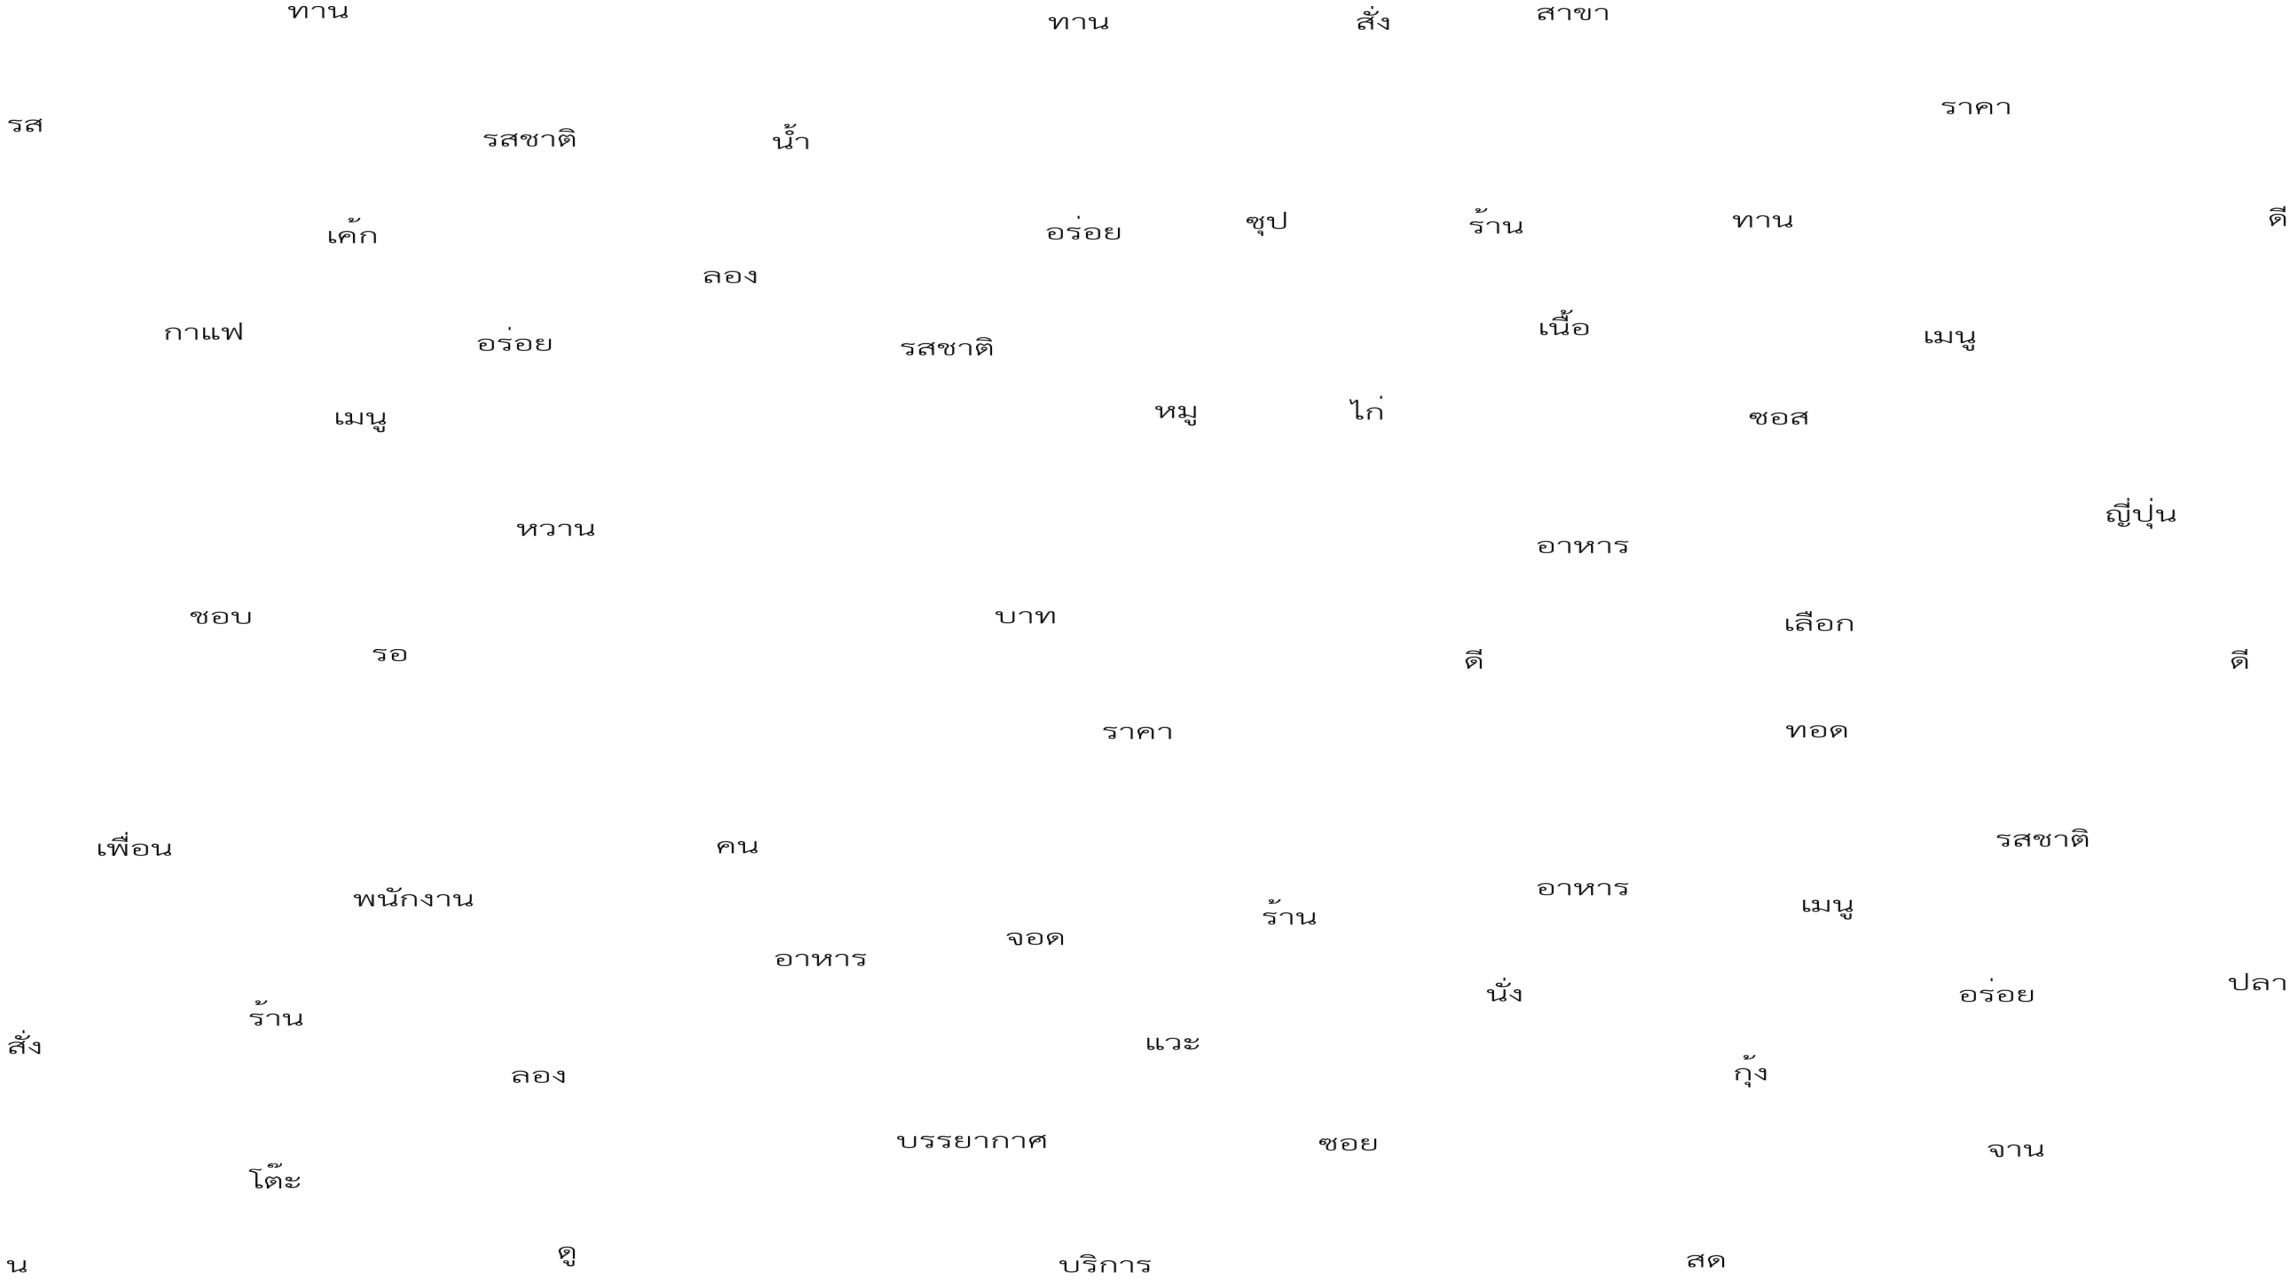

<Figure size 2304x1296 with 0 Axes>

In [ ]:
wn_lda_wc = wc.generate_kmeans_cloud(path,wn_ldamallet_eq,60,850,1250) 

##kmeans recol

In [ ]:
cols = ["#BF0F61","#4696A2","#D95043","#55A45B","#695752","#834fab"]

In [ ]:
color_to_words = {cols[col]: [ wn_k_means_freq[col][1][i][0] for i in range(10) ] for col in range(len(wn_k_means_freq))}
color_to_words

{'#4696A2': ['อร่อย',
  'เมนู',
  'จาน',
  'นุ่ม',
  'ผัด',
  'โอเค',
  'แวะ',
  'ชิม',
  'ก๋วยเตี๋ยว',
  'น้ำจิ้ม'],
 '#55A45B': ['รสชาติ',
  'หมู',
  'หวาน',
  'หอม',
  'ซุป',
  'ไก่',
  'กาแฟ',
  'เค้ก',
  'ซอส',
  'ผัก'],
 '#695752': ['ดี',
  'บาท',
  'ชอบ',
  'ลอง',
  'ดู',
  'แพง',
  'หน้า',
  'รอ',
  'ร้อน',
  'เย็น'],
 '#834fab': ['อาหาร',
  'กิน',
  'ราคา',
  'เนื้อ',
  'น้ำ',
  'ปลา',
  'ทอด',
  'กุ้ง',
  'สด',
  'ข้าว'],
 '#BF0F61': ['ทาน',
  'สั่ง',
  'เลือก',
  'นั่ง',
  'บรรยากาศ',
  'แนะนำ',
  'โต๊ะ',
  'พนักงาน',
  'ขาย',
  'เดิน'],
 '#D95043': ['ร้าน',
  'คน',
  'รส',
  'บริการ',
  'กรอบ',
  'ใส่',
  'สาขา',
  'ใช้ได้',
  'เส้น',
  'ย่าง']}

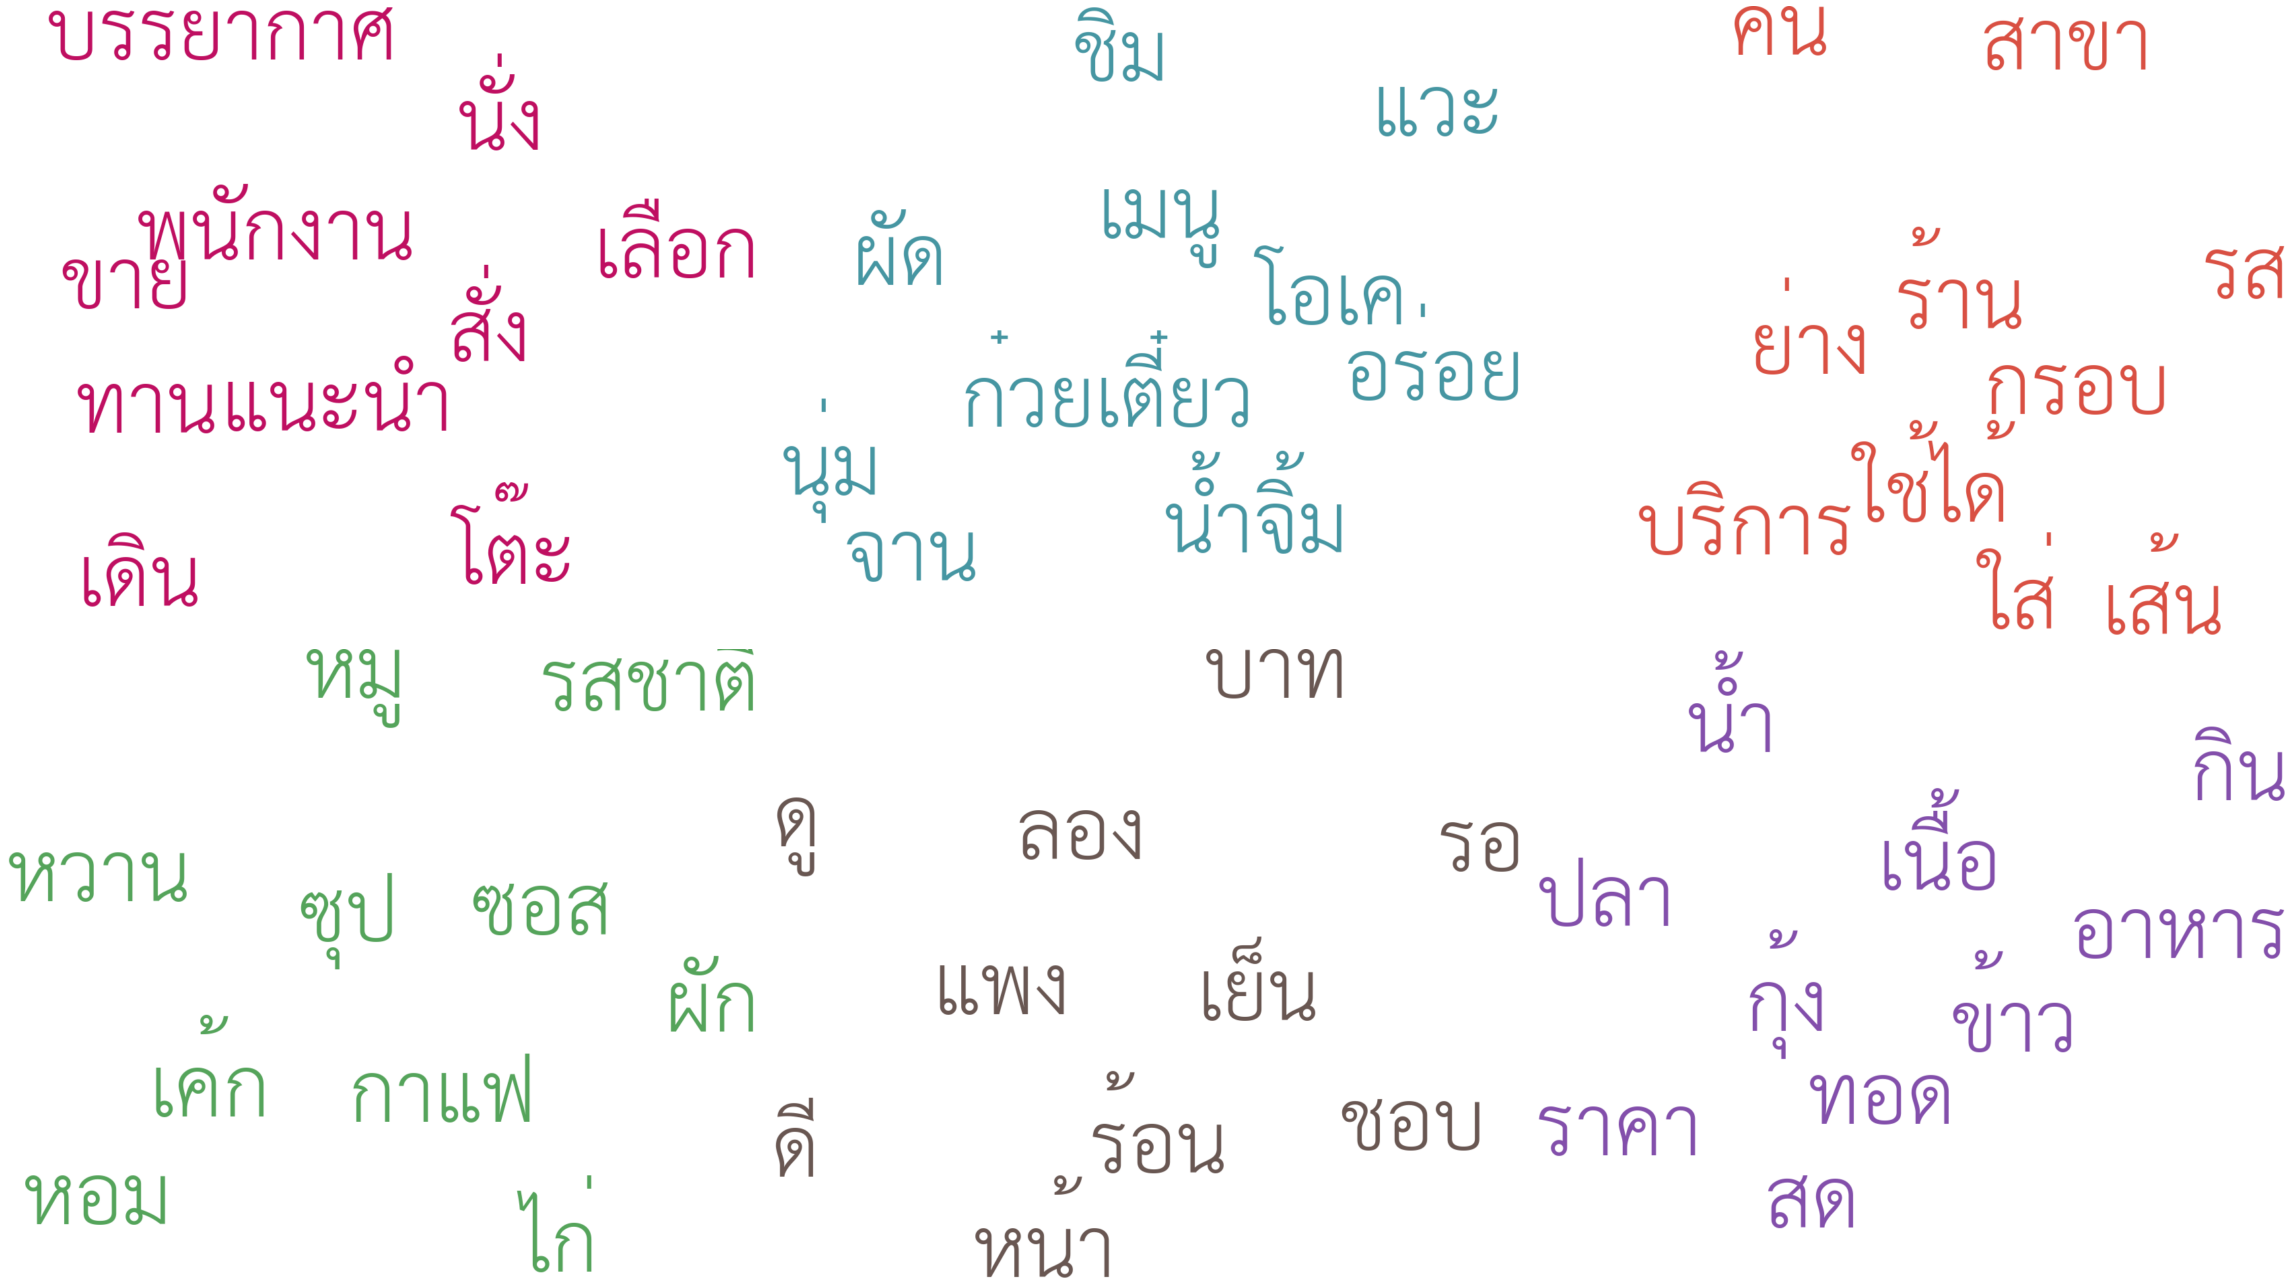

<Figure size 2304x1296 with 0 Axes>

In [ ]:
default_color = "#2D2926"

# Create a color function with multiple tones
grouped_color_func = wc.grouped_color_func(color_to_words,default_color)

fig2, axes2 = plt.subplots(2,3, figsize=(32,18), sharex=True, sharey=True)

for i, ax in enumerate(axes2.flatten()):
    fig2.add_subplot(ax)
          
    fig2.tight_layout(rect=[0, 0.03, 1, 0.95])
# Apply our color function
    wn_kmeans_wc[i].recolor(color_func=grouped_color_func)

    plt.gca().imshow(wn_kmeans_wc[i],aspect="auto",interpolation = "bilinear")  # blur it right here
    plt.gca().axis('off')



plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.figure(figsize=(32,18))
plt.show()

In [ ]:
wn_k_means_freq

[(0,
  [('ทาน', 0.2645045384409206),
   ('สั่ง', 0.20764544381098643),
   ('เลือก', 0.09352158385430627),
   ('นั่ง', 0.08978361814796838),
   ('บรรยากาศ', 0.07832342096303326),
   ('แนะนำ', 0.0665227501575596),
   ('โต๊ะ', 0.06205312837304318),
   ('พนักงาน', 0.05034663112218656),
   ('ขาย', 0.04667386249212202),
   ('เดิน', 0.04062502263787371)]),
 (1,
  [('อร่อย', 0.353032516710074),
   ('เมนู', 0.21656397117468115),
   ('จาน', 0.09145898179713582),
   ('นุ่ม', 0.06707321376895985),
   ('ผัด', 0.05011963495458106),
   ('โอเค', 0.04740226282987839),
   ('แวะ', 0.045193074583042184),
   ('ชิม', 0.044790762346397894),
   ('ก๋วยเตี๋ยว', 0.043901440560131566),
   ('น้ำจิ้ม', 0.04046414127511805)]),
 (2,
  [('ร้าน', 0.5485185382201181),
   ('คน', 0.10434065641789457),
   ('รส', 0.06944518325442843),
   ('บริการ', 0.05225809883504442),
   ('กรอบ', 0.04452364487472738),
   ('ใส่', 0.04416724293845417),
   ('สาขา', 0.042374594393318796),
   ('ใช้ได้', 0.03301239427629129),
   ('เส้น', 0.0311

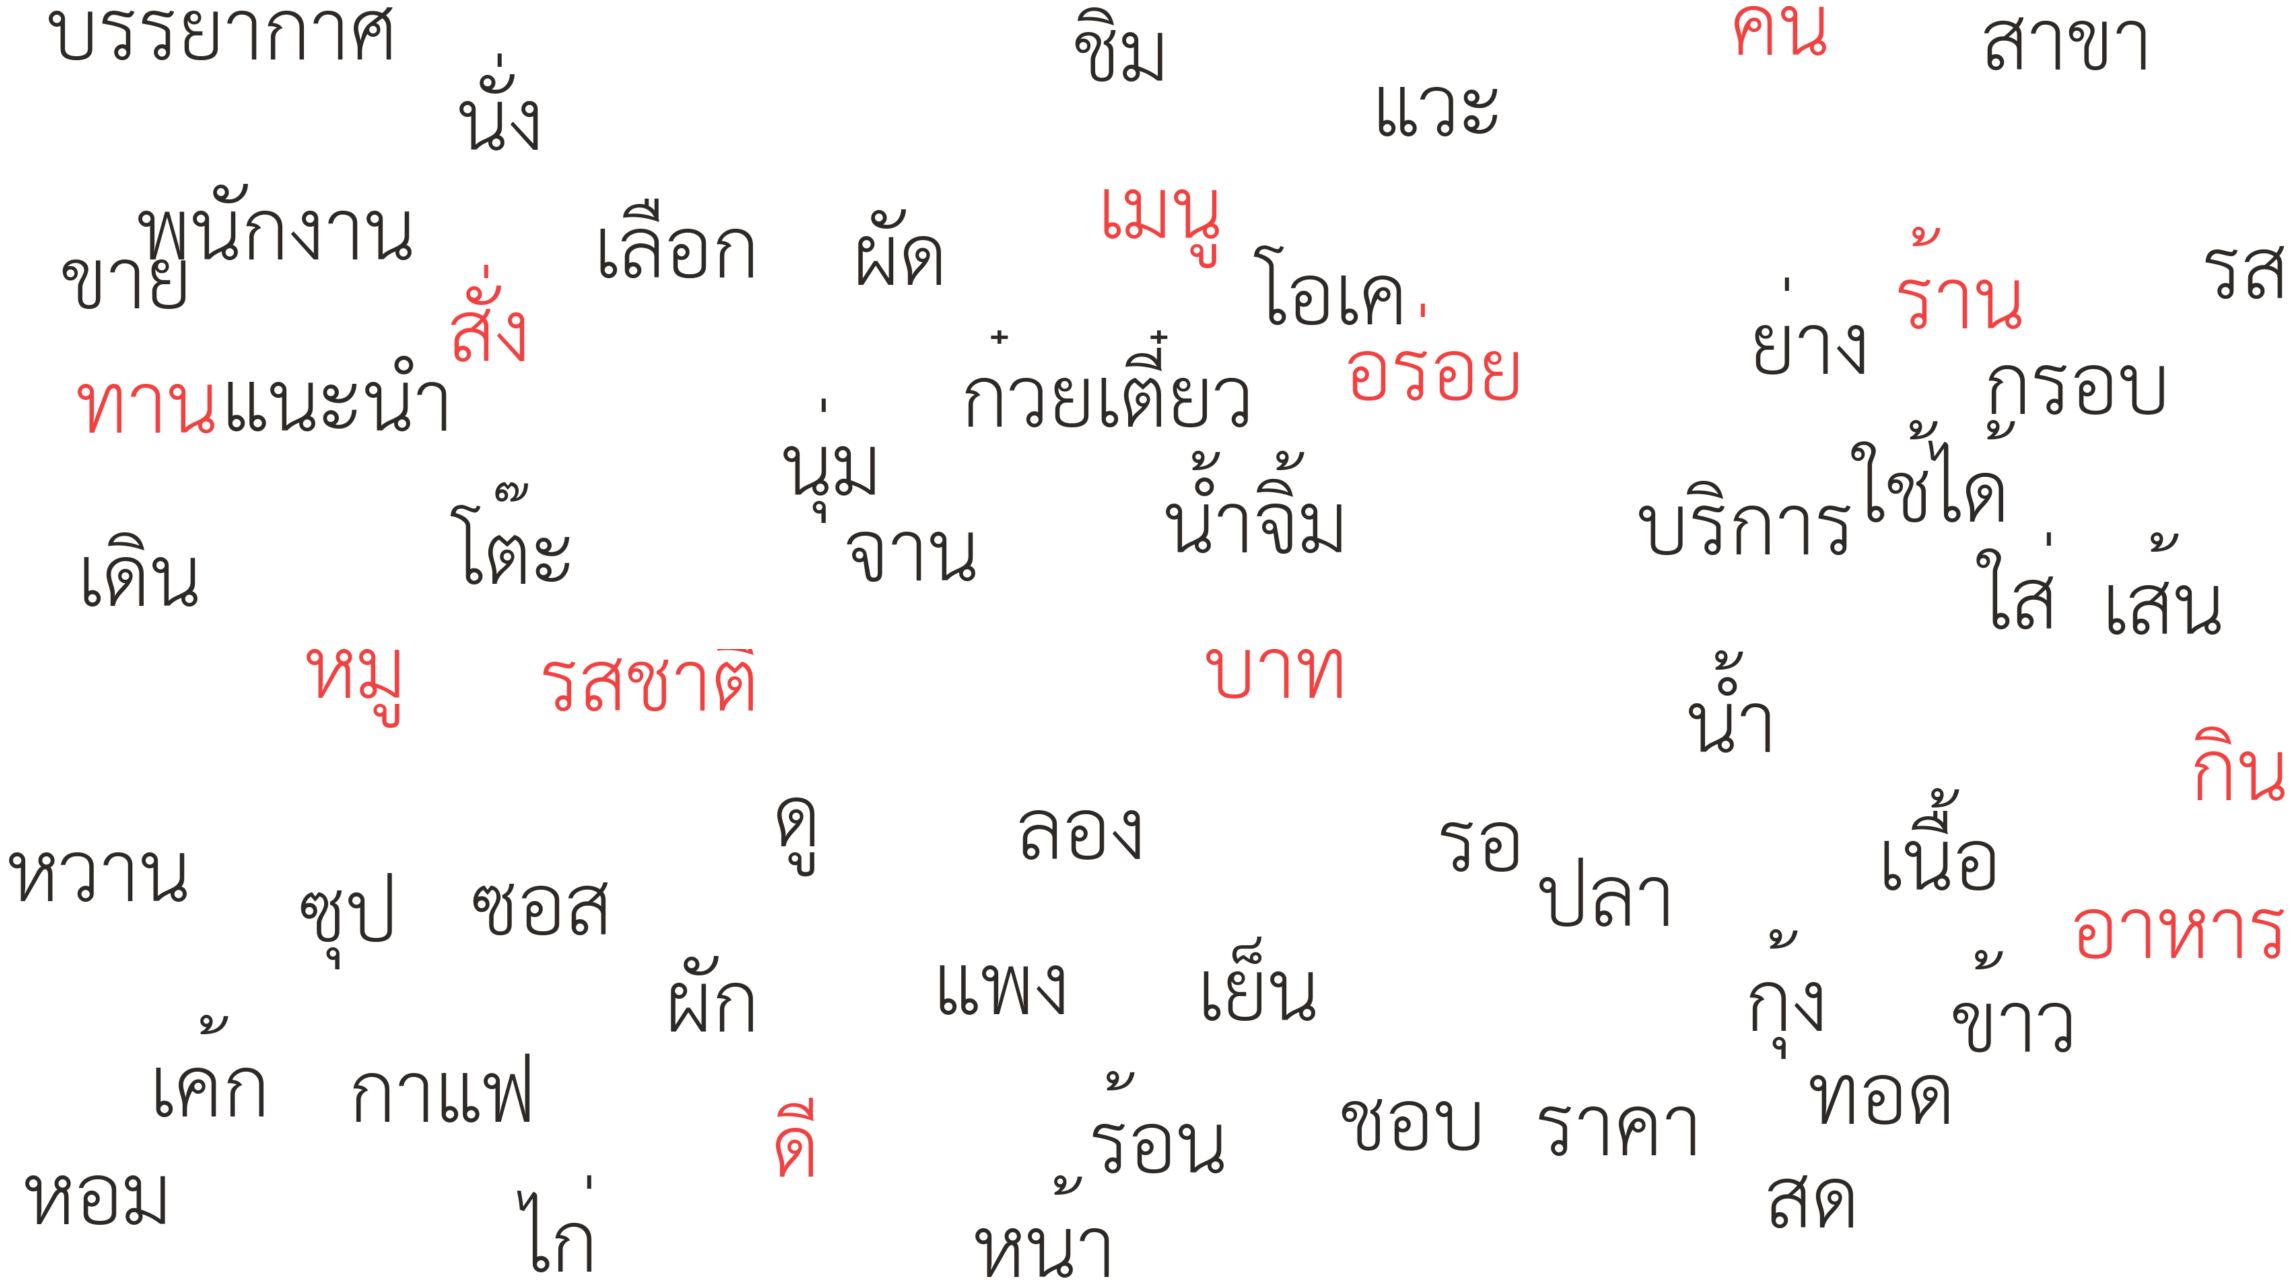

<Figure size 2304x1296 with 0 Axes>

In [ ]:
cherry = "#F24141"
color_to_words = {cherry: [ wn_k_means_freq[col][1][i][0] for i in range(10) if i < 2 for col in range(len(wn_k_means_freq)) ]}
color_to_words
default_color = "#2D2926"

# Create a color function with multiple tones
grouped_color_func = wc.grouped_color_func(color_to_words,default_color)

fig2, axes2 = plt.subplots(2,3, figsize=(32,18), sharex=True, sharey=True)

for i, ax in enumerate(axes2.flatten()):
    fig2.add_subplot(ax)
          
    fig2.tight_layout(rect=[0, 0.03, 1, 0.95])
# Apply our color function
    wn_kmeans_wc[i].recolor(color_func=grouped_color_func)

    plt.gca().imshow(wn_kmeans_wc[i],aspect="auto",interpolation = "bilinear")  # blur it right here
    plt.gca().axis('off')



plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.figure(figsize=(32,18))
plt.show()